# Stock market prediction in the US banking sector

## Import library

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## Getting Data

In [2]:
# Fetch historical data for JPM
JPM = yf.Ticker('JPM')
start_date = "2010-01-01"
end_date = "2022-01-01"
hist_JPM = JPM.history(start=start_date, end=end_date)

# Reset the index to move the date to a column
hist_JPM = hist_JPM.reset_index()

# Export to CSV, ensuring the date format is 'yyyy-mm-dd'
hist_JPM.to_csv('hist_JPM.csv', date_format='%Y-%m-%d', index=False)

hist_JPM.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,28.935893,29.766787,28.852801,29.669847,35460500,0.05,0.0
1,2010-01-05 00:00:00-05:00,29.628299,30.355331,29.621373,30.244545,41208300,0.00,0.0
2,2010-01-06 00:00:00-05:00,30.085293,30.528436,29.988356,30.410725,27729000,0.00,0.0
3,2010-01-07 00:00:00-05:00,30.320720,31.241627,30.196086,31.013132,44864700,0.00,0.0
4,2010-01-08 00:00:00-05:00,30.722325,30.950822,30.521527,30.936974,33110100,0.00,0.0


In [3]:
BAC = yf.Ticker('BAC')
start_date = "2010-01-01"
end_date = "2022-01-01"
hist_BAC = BAC.history(start=start_date, end=end_date)

# Reset the index to move the date to a column
hist_BAC = hist_BAC.reset_index()

# Export to CSV, ensuring the date format is 'yyyy-mm-dd'
hist_BAC.to_csv('hist_BAC.csv', date_format='%Y-%m-%d', index=False)

hist_BAC.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,12.314941,12.727055,12.217973,12.678571,180845200,0.0,0.0
1,2010-01-05 00:00:00-05:00,12.718974,13.098765,12.686652,13.090686,209521300,0.0,0.0
2,2010-01-06 00:00:00-05:00,13.098765,13.365428,12.953314,13.244217,205257900,0.0,0.0
3,2010-01-07 00:00:00-05:00,13.478560,13.890674,13.341188,13.680576,320868400,0.0,0.0
4,2010-01-08 00:00:00-05:00,13.720971,13.817940,13.438147,13.559359,220104700,0.0,0.0


In [4]:
WFC = yf.Ticker('WFC')
start_date = "2010-01-01"
end_date = "2022-01-01"
hist_WFC = WFC.history(start=start_date, end=end_date)
hist_WFC.head()

# Reset the index to move the date to a column
hist_WFC = hist_WFC.reset_index()

# Export to CSV, ensuring the date format is 'yyyy-mm-dd'
hist_WFC.to_csv('hist_WFC.csv', date_format='%Y-%m-%d', index=False)

hist_WFC.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,18.566508,18.882592,18.429080,18.772650,39335700,0.0,0.0
1,2010-01-05 00:00:00-05:00,18.738297,19.404822,18.717682,19.288008,55416000,0.0,0.0
2,2010-01-06 00:00:00-05:00,19.260522,19.466663,19.095608,19.315493,33237000,0.0,0.0
3,2010-01-07 00:00:00-05:00,19.322365,20.222517,19.184936,20.016375,61649000,0.0,0.0
4,2010-01-08 00:00:00-05:00,19.858334,20.167547,19.652192,19.830849,35508700,0.0,0.0


In [5]:
hist_INFLATION = pd.read_csv('FPCPITOTLZGUSA.csv',date_format='%Y-%m-%d', sep =',') 
hist_GDPC1 = pd.read_csv('GDPC1.csv',date_format='%Y-%m-%d', sep =',') 
hist_UNR = pd.read_csv('UNRATE.csv', date_format='%Y-%m-%d', sep =',') 
hist_PCE = pd.read_csv('PCE.csv', date_format='%Y-%m-%d', sep =',') 
hist_TPD = pd.read_csv('GFDEGDQ188S.csv', date_format='%Y-%m-%d', sep =',') 
hist_FER = pd.read_csv('FEDFUNDS.csv', date_format='%Y-%m-%d', sep =',') 
hist_DEXU = pd.read_csv('DEXUSEU.csv', date_format='%Y-%m-%d', sep =',') 
hist_IR = pd.read_csv('REAINTRATREARAT.csv', date_format='%Y-%m-%d', sep =',')
hist_CPIAUCSL = pd.read_csv('CPIAUCSL.csv', date_format='%Y-%m-%d', sep =',') 
hist_GDPPC = pd.read_csv('A939RX0Q048SBEA.csv', date_format='%Y-%m-%d', sep =',') 

In [6]:
# U.S. Dollars to Euro Spot Exchange Rate (DEXUSEU)
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product (GFDEGDQ188S)
# Unemployment Rate (UNRATE)
# Personal Consumption Expenditures (PCE)
# Federal Funds Effective Rate (FEDFUNDS)
# Real gross domestic product per capita (A939RX0Q048SBEA)
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
# Inflation, consumer prices for the United States (FPCPITOTLZGUSA)
# Real Gross Domestic Product (GDPC1)
# Real Interest Rate (REAINTRATREARAT)

## Data Preprocessing

In [7]:
hist_DEXU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     3130 non-null   object
 1   DEXUSEU  3130 non-null   object
dtypes: object(2)
memory usage: 49.0+ KB


In [8]:
# Replacing '.' in 'DEXUSEU' with NaN
hist_DEXU['DEXUSEU'] = hist_DEXU['DEXUSEU'].replace('.', np.nan)

In [9]:
# Convert the 'Value' column from object (string) to float
hist_DEXU['DEXUSEU'] = hist_DEXU['DEXUSEU'].astype(float)

hist_DEXU.info(), hist_DEXU

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     3130 non-null   object 
 1   DEXUSEU  3001 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.0+ KB


(None,
             DATE  DEXUSEU
 0     2010-01-04   1.4419
 1     2010-01-05   1.4402
 2     2010-01-06   1.4404
 3     2010-01-07   1.4314
 4     2010-01-08   1.4357
 ...          ...      ...
 3125  2021-12-27   1.1329
 3126  2021-12-28   1.1314
 3127  2021-12-29   1.1337
 3128  2021-12-30   1.1318
 3129  2021-12-31      NaN
 
 [3130 rows x 2 columns])

In [10]:
# Rename columns 
hist_INFLATION.rename(columns={'DATE': 'Date'}, inplace=True)
hist_INFLATION.rename(columns={'FPCPITOTLZGUSA': 'Inflation'}, inplace=True)

hist_GDPC1.rename(columns={'DATE': 'Date'}, inplace=True)
hist_GDPC1.rename(columns={'GDPC1': 'Gross Domestic Product'}, inplace=True)

hist_UNR.rename(columns={'DATE': 'Date'}, inplace=True)
hist_UNR.rename(columns={'UNRATE': 'Unemployment Rate'}, inplace=True)

hist_PCE.rename(columns={'DATE': 'Date'}, inplace=True)
hist_PCE.rename(columns={'PCE': 'Personal Consumption Expenditures'}, inplace=True)

hist_TPD.rename(columns={'DATE': 'Date'}, inplace=True)
hist_TPD.rename(columns={'GFDEGDQ188S': 'Total Public Debt'}, inplace=True)

hist_FER.rename(columns={'DATE': 'Date'}, inplace=True)
hist_FER.rename(columns={'FEDFUNDS': 'Funds Effective Rate'}, inplace=True)

hist_DEXU.rename(columns={'DATE': 'Date'}, inplace=True)
hist_DEXU.rename(columns={'DEXUSEU': 'Exchange Rate'}, inplace=True)

hist_IR.rename(columns={'DATE': 'Date'}, inplace=True)
hist_IR.rename(columns={'REAINTRATREARAT10Y': 'Interest Rate'}, inplace=True)

hist_CPIAUCSL.rename(columns={'DATE': 'Date'}, inplace=True)
hist_CPIAUCSL.rename(columns={'CPIAUCSL': 'Consumer Price Index'}, inplace=True)

hist_GDPPC.rename(columns={'DATE': 'Date'}, inplace=True)
hist_GDPPC.rename(columns={'A939RX0Q048SBEA': 'Gross Domestic Product Per Capita'}, inplace=True)

In [11]:
hist_INFLATION['Date'] = pd.to_datetime(hist_INFLATION['Date']).dt.date
hist_GDPC1['Date'] = pd.to_datetime(hist_GDPC1['Date']).dt.date
hist_UNR['Date'] = pd.to_datetime(hist_UNR['Date']).dt.date
hist_PCE['Date'] = pd.to_datetime(hist_PCE['Date']).dt.date
hist_TPD['Date'] = pd.to_datetime(hist_TPD['Date']).dt.date
hist_FER['Date'] = pd.to_datetime(hist_FER['Date']).dt.date
hist_DEXU['Date'] = pd.to_datetime(hist_DEXU['Date']).dt.date
hist_IR['Date'] = pd.to_datetime(hist_IR['Date']).dt.date
hist_CPIAUCSL['Date'] = pd.to_datetime(hist_CPIAUCSL['Date']).dt.date
hist_GDPPC['Date'] = pd.to_datetime(hist_GDPPC['Date']).dt.date

hist_JPM['Date'] = hist_JPM['Date'].dt.tz_localize(None).dt.date
hist_BAC['Date'] = hist_BAC['Date'].dt.tz_localize(None).dt.date
hist_WFC['Date'] = hist_WFC['Date'].dt.tz_localize(None).dt.date

In [12]:
type(hist_INFLATION.loc[0, 'Date'])

datetime.date

In [13]:
type(hist_JPM.loc[0, 'Date'])

datetime.date

In [14]:
# Dates to add
dates_to_add = ["2010-01-01", "2010-01-02", "2010-01-03"]

# Create a DataFrame with the new dates and NaN values for other columns
new_rows = pd.DataFrame({
    "Date": dates_to_add})

df_ticker_list = [hist_JPM, hist_BAC, hist_WFC]
ticker_name = ["JPM", "BAC", "WFC"]
df_ticker_dict = dict(zip(ticker_name,df_ticker_list))

# Append the new rows to the beginning of the original DataFrame
for name,ticker_df in df_ticker_dict.items():
    ticker_df = pd.concat([new_rows, ticker_df], ignore_index=True)
    ticker_df['Date'] = pd.to_datetime(ticker_df['Date']).dt.date
    df_ticker_dict[name] = ticker_df


df_ticker_dict["JPM"]
#df_ticker_dict["BAC"]
#df_ticker_dict["WFC"]


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,28.935893,29.766787,28.852801,29.669847,35460500.0,0.05,0.0
4,2010-01-05,29.628299,30.355331,29.621373,30.244545,41208300.0,0.00,0.0
...,...,...,...,...,...,...,...,...
3019,2021-12-27,147.446418,148.007754,146.267586,147.970337,6188100.0,0.00,0.0
3020,2021-12-28,148.007764,149.832130,147.895499,148.419418,6342300.0,0.00,0.0
3021,2021-12-29,148.615883,149.345629,147.960970,148.344559,6398900.0,0.00,0.0
3022,2021-12-30,148.859130,149.916333,148.166801,148.269714,6948200.0,0.00,0.0


### Merging the data sets ( Historical data and all features)

In [15]:
# List of DataFrames

merged_df_ticker_dict = {}
for name,ticker_df in df_ticker_dict.items():
    dfs = [ticker_df, hist_INFLATION, hist_GDPC1, hist_UNR, hist_PCE, hist_TPD, hist_FER, hist_DEXU, hist_IR, hist_CPIAUCSL, hist_GDPPC]

    # Initialize the merged DataFrame with the first DataFrame in the list
    merged_df = dfs[0]

    # Iterate over the list of DataFrames starting from the second one
    for df in dfs[1:]:
        # Merge the current DataFrame with the accumulated merged DataFrame
        merged_df = pd.merge(merged_df, df, on='Date', how='outer')

    # At this point, merged_df contains all your DataFrames merged together on 'Date'


    merged_df.sort_values(by='Date', ascending=True, inplace=True)
    merged_df = merged_df.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1)
    merged_df_ticker_dict[name] = merged_df



In [16]:
print(merged_df_ticker_dict["JPM"].isna().sum())
print(merged_df_ticker_dict["BAC"].isna().sum())
print(merged_df_ticker_dict["WFC"].isna().sum())

Date                                    0
Close                                 153
Volume                                153
Inflation                            3161
Gross Domestic Product               3125
Unemployment Rate                    3029
Personal Consumption Expenditures    3029
Total Public Debt                    3125
Funds Effective Rate                 3029
Exchange Rate                         173
Interest Rate                        3029
Consumer Price Index                 3029
Gross Domestic Product Per Capita    3125
dtype: int64
Date                                    0
Close                                 153
Volume                                153
Inflation                            3161
Gross Domestic Product               3125
Unemployment Rate                    3029
Personal Consumption Expenditures    3029
Total Public Debt                    3125
Funds Effective Rate                 3029
Exchange Rate                         173
Interest Rate        

In [17]:
merged_df_ticker_dict["JPM"]

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-01,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,29.669847,35460500.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4419,NaN,NaN,NaN
4,2010-01-05,30.244545,41208300.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4402,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2021-12-28,148.419418,6342300.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1314,NaN,NaN,NaN
3021,2021-12-29,148.344559,6398900.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1337,NaN,NaN,NaN
3022,2021-12-30,148.269714,6948200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1318,NaN,NaN,NaN
3023,2021-12-31,148.148117,5805900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
merged_df_ticker_dict["BAC"]

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-01,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,12.678571,180845200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4419,NaN,NaN,NaN
4,2010-01-05,13.090686,209521300.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4402,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2021-12-28,42.067490,32492400.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1314,NaN,NaN,NaN
3021,2021-12-29,42.001614,25294900.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1337,NaN,NaN,NaN
3022,2021-12-30,41.907505,23852200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1318,NaN,NaN,NaN
3023,2021-12-31,41.869862,24253900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_df_ticker_dict["WFC"]

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-01,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,18.772650,39335700.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4419,NaN,NaN,NaN
4,2010-01-05,19.288008,55416000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4402,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2021-12-28,45.553440,14320500.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1314,NaN,NaN,NaN
3021,2021-12-29,45.581661,14390700.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1337,NaN,NaN,NaN
3022,2021-12-30,45.252384,13701300.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1318,NaN,NaN,NaN
3023,2021-12-31,45.139484,12649300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Fill NaN values forward
merged_df_filled_forward_ticker_dict = {}
for name,ticker_df in merged_df_ticker_dict.items():
    merged_df_filled_forward_ticker_dict[name] = ticker_df.fillna(method='ffill')

merged_df_filled_forward_ticker_dict['JPM']
#merged_df_filled_forward_ticker_dict['BAC']
#merged_df_filled_forward_ticker_dict['WFC']


,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-01,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
1,2010-01-02,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
2,2010-01-03,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
3,2010-01-04,29.669847,35460500.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4419,1.297925,217.488,53683.0
4,2010-01-05,30.244545,41208300.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4402,1.297925,217.488,53683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2021-12-28,148.419418,6342300.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1314,0.091689,280.808,65648.0
3021,2021-12-29,148.344559,6398900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1337,0.091689,280.808,65648.0
3022,2021-12-30,148.269714,6948200.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0
3023,2021-12-31,148.148117,5805900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0


In [21]:
merged_df_ticker_dict["BAC"]

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-01,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,12.678571,180845200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4419,NaN,NaN,NaN
4,2010-01-05,13.090686,209521300.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4402,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2021-12-28,42.067490,32492400.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1314,NaN,NaN,NaN
3021,2021-12-29,42.001614,25294900.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1337,NaN,NaN,NaN
3022,2021-12-30,41.907505,23852200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1318,NaN,NaN,NaN
3023,2021-12-31,41.869862,24253900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
merged_df_ticker_dict["WFC"]

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-01,NaN,NaN,1.640043,16582.710,9.8,10056.1,86.51175,0.11,NaN,1.297925,217.488,53683.0
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,18.772650,39335700.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4419,NaN,NaN,NaN
4,2010-01-05,19.288008,55416000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4402,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2021-12-28,45.553440,14320500.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1314,NaN,NaN,NaN
3021,2021-12-29,45.581661,14390700.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1337,NaN,NaN,NaN
3022,2021-12-30,45.252384,13701300.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1318,NaN,NaN,NaN
3023,2021-12-31,45.139484,12649300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Dropping the first 3 rows that I initialy added
merged_df_ticker_dict = {}
for name,ticker_df in merged_df_filled_forward_ticker_dict.items():
    merged_df_ticker_dict[name] = ticker_df.iloc[3:].reset_index(drop=True)

merged_df_ticker_dict['JPM']
#merged_df_ticker_dict['BAC']
#merged_df_ticker_dict['WFC']

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-04,29.669847,35460500.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4419,1.297925,217.488,53683.0
1,2010-01-05,30.244545,41208300.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4402,1.297925,217.488,53683.0
2,2010-01-06,30.410725,27729000.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4404,1.297925,217.488,53683.0
3,2010-01-07,31.013132,44864700.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4314,1.297925,217.488,53683.0
4,2010-01-08,30.936974,33110100.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4357,1.297925,217.488,53683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,2021-12-28,148.419418,6342300.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1314,0.091689,280.808,65648.0
3167,2021-12-29,148.344559,6398900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1337,0.091689,280.808,65648.0
3168,2021-12-30,148.269714,6948200.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0
3169,2021-12-31,148.148117,5805900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0


In [24]:
merged_df_ticker_dict['BAC']

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-04,12.678571,180845200.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4419,1.297925,217.488,53683.0
1,2010-01-05,13.090686,209521300.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4402,1.297925,217.488,53683.0
2,2010-01-06,13.244217,205257900.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4404,1.297925,217.488,53683.0
3,2010-01-07,13.680576,320868400.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4314,1.297925,217.488,53683.0
4,2010-01-08,13.559359,220104700.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4357,1.297925,217.488,53683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,2021-12-28,42.067490,32492400.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1314,0.091689,280.808,65648.0
3167,2021-12-29,42.001614,25294900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1337,0.091689,280.808,65648.0
3168,2021-12-30,41.907505,23852200.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0
3169,2021-12-31,41.869862,24253900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0


In [25]:
merged_df_ticker_dict['WFC']

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
0,2010-01-04,18.772650,39335700.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4419,1.297925,217.488,53683.0
1,2010-01-05,19.288008,55416000.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4402,1.297925,217.488,53683.0
2,2010-01-06,19.315493,33237000.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4404,1.297925,217.488,53683.0
3,2010-01-07,20.016375,61649000.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4314,1.297925,217.488,53683.0
4,2010-01-08,19.830849,35508700.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4357,1.297925,217.488,53683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,2021-12-28,45.553440,14320500.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1314,0.091689,280.808,65648.0
3167,2021-12-29,45.581661,14390700.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1337,0.091689,280.808,65648.0
3168,2021-12-30,45.252384,13701300.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0
3169,2021-12-31,45.139484,12649300.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0


In [26]:
print(merged_df_ticker_dict['JPM'].isna().sum())
print(merged_df_ticker_dict['BAC'].isna().sum())
print(merged_df_ticker_dict['WFC'].isna().sum())

Date                                 0
Close                                0
Volume                               0
Inflation                            0
Gross Domestic Product               0
Unemployment Rate                    0
Personal Consumption Expenditures    0
Total Public Debt                    0
Funds Effective Rate                 0
Exchange Rate                        0
Interest Rate                        0
Consumer Price Index                 0
Gross Domestic Product Per Capita    0
dtype: int64
Date                                 0
Close                                0
Volume                               0
Inflation                            0
Gross Domestic Product               0
Unemployment Rate                    0
Personal Consumption Expenditures    0
Total Public Debt                    0
Funds Effective Rate                 0
Exchange Rate                        0
Interest Rate                        0
Consumer Price Index                 0
Gross Domest

In [27]:
merged_df_ticker_dict['JPM'].info()
merged_df_ticker_dict['BAC'].info()
merged_df_ticker_dict['WFC'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3171 non-null   object 
 1   Close                              3171 non-null   float64
 2   Volume                             3171 non-null   float64
 3   Inflation                          3171 non-null   float64
 4   Gross Domestic Product             3171 non-null   float64
 5   Unemployment Rate                  3171 non-null   float64
 6   Personal Consumption Expenditures  3171 non-null   float64
 7   Total Public Debt                  3171 non-null   float64
 8   Funds Effective Rate               3171 non-null   float64
 9   Exchange Rate                      3171 non-null   float64
 10  Interest Rate                      3171 non-null   float64
 11  Consumer Price Index               3171 non-null   float

### Statistical Summary

In [28]:
merged_df_ticker_dict['JPM'].describe()
#merged_df_ticker_dict['BAC'].describe()
#merged_df_ticker_dict['WFC'].describe()

,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita
count,3171.000000,3.171000e+03,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,64.977194,2.118297e+07,1.970972,18957.398075,6.297919,12686.698991,103.468333,0.549325,1.219276,0.462171,241.787651,58698.488489
std,35.910049,1.426052e+07,1.087865,1468.329990,2.215019,1700.141368,9.821976,0.727253,0.107836,0.417489,14.765812,3232.793276
min,20.152531,3.324300e+06,0.118627,16582.710000,3.500000,10056.100000,86.511750,0.050000,1.037500,-0.407134,217.199000,53683.000000
25%,33.398624,1.223210e+07,1.261583,17662.400000,4.400000,11252.400000,98.727970,0.090000,1.124250,0.137070,231.679000,55859.000000
50%,51.215134,1.662700e+07,1.812210,19001.690000,5.800000,12452.000000,102.346170,0.150000,1.189800,0.512460,238.033000,58486.000000
75%,91.167950,2.590200e+07,2.130110,20304.874000,8.100000,14027.100000,104.648910,0.790000,1.315450,0.713300,252.772000,61622.000000
max,160.712860,2.172942e+08,8.002800,21847.602000,14.800000,16888.600000,132.963650,2.420000,1.487500,1.309105,282.390000,65648.000000


### Moving Averages (MA)

In [29]:
def calculate_price_metrics(df):
    df['MA3'] = df['Close'].rolling(window=3, min_periods=1).mean()
    df['MA7'] = df['Close'].rolling(window=7, min_periods=1).mean()
    df['MA10'] = df['Close'].rolling(window=10, min_periods=1).mean()
    df['MA15'] = df['Close'].rolling(window=15, min_periods=1).mean()
    df['MA20'] = df['Close'].rolling(window=20, min_periods=1).mean()
    return df

for name,ticker_df in merged_df_ticker_dict.items():
    merged_df_ticker_dict[name] = calculate_price_metrics(ticker_df)
    
merged_df_ticker_dict['JPM']
#merged_df_ticker_dict['BAC']
#merged_df_ticker_dict['WFC']

,Date,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita,MA3,MA7,MA10,MA15,MA20
0,2010-01-04,29.669847,35460500.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4419,1.297925,217.488,53683.0,29.669847,29.669847,29.669847,29.669847,29.669847
1,2010-01-05,30.244545,41208300.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4402,1.297925,217.488,53683.0,29.957196,29.957196,29.957196,29.957196,29.957196
2,2010-01-06,30.410725,27729000.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4404,1.297925,217.488,53683.0,30.108372,30.108372,30.108372,30.108372,30.108372
3,2010-01-07,31.013132,44864700.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4314,1.297925,217.488,53683.0,30.556134,30.334562,30.334562,30.334562,30.334562
4,2010-01-08,30.936974,33110100.0,1.640043,16582.710,9.8,10056.1,86.51175,0.11,1.4357,1.297925,217.488,53683.0,30.786943,30.455045,30.455045,30.455045,30.455045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,2021-12-28,148.419418,6342300.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1314,0.091689,280.808,65648.0,147.839361,146.758102,147.180710,147.895491,148.350181
3167,2021-12-29,148.344559,6398900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1337,0.091689,280.808,65648.0,148.244771,147.375580,147.238715,147.761391,148.381522
3168,2021-12-30,148.269714,6948200.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0,148.344564,147.695010,147.058151,147.637895,148.253815
3169,2021-12-31,148.148117,5805900.0,4.697859,21847.602,3.9,16799.2,120.12854,0.08,1.1318,0.091689,280.808,65648.0,148.254130,147.915543,147.206911,147.546210,148.256623


### Correlation Coefficients

for handling this error: TypeError: float() argument must be a string or a real number, not 'datetime.date' I change the date column to index again

In [30]:
# The correlation values for the 'Close' column with all other columns
for name,ticker_df in merged_df_ticker_dict.items():
    ticker_df.set_index('Date', inplace=True)

corr_matrix_dict = {} 
for name,ticker_df in merged_df_ticker_dict.items():
    corr_matrix_dict[name] = ticker_df.corr()['Close']
    
print('JPM: \n', corr_matrix_dict['JPM'],"\n")
print('BAC: \n', corr_matrix_dict['BAC'],"\n")
print('WFC: \n', corr_matrix_dict['WFC'],"\n")

JPM: 
 Close                                1.000000
Volume                              -0.491753
Inflation                            0.479460
Gross Domestic Product               0.945489
Unemployment Rate                   -0.545725
Personal Consumption Expenditures    0.970646
Total Public Debt                    0.765329
Funds Effective Rate                 0.422049
Exchange Rate                       -0.554094
Interest Rate                       -0.154076
Consumer Price Index                 0.958149
Gross Domestic Product Per Capita    0.947786
MA3                                  0.999703
MA7                                  0.999027
MA10                                 0.998553
MA15                                 0.997672
MA20                                 0.996794
Name: Close, dtype: float64 

BAC: 
 Close                                1.000000
Volume                              -0.562104
Inflation                            0.488438
Gross Domestic Product              

In [31]:
for name,ticker_df in merged_df_ticker_dict.items():
    ticker_df.drop(['MA10', 'MA15', 'MA20'], axis=1, inplace=True)
    
    

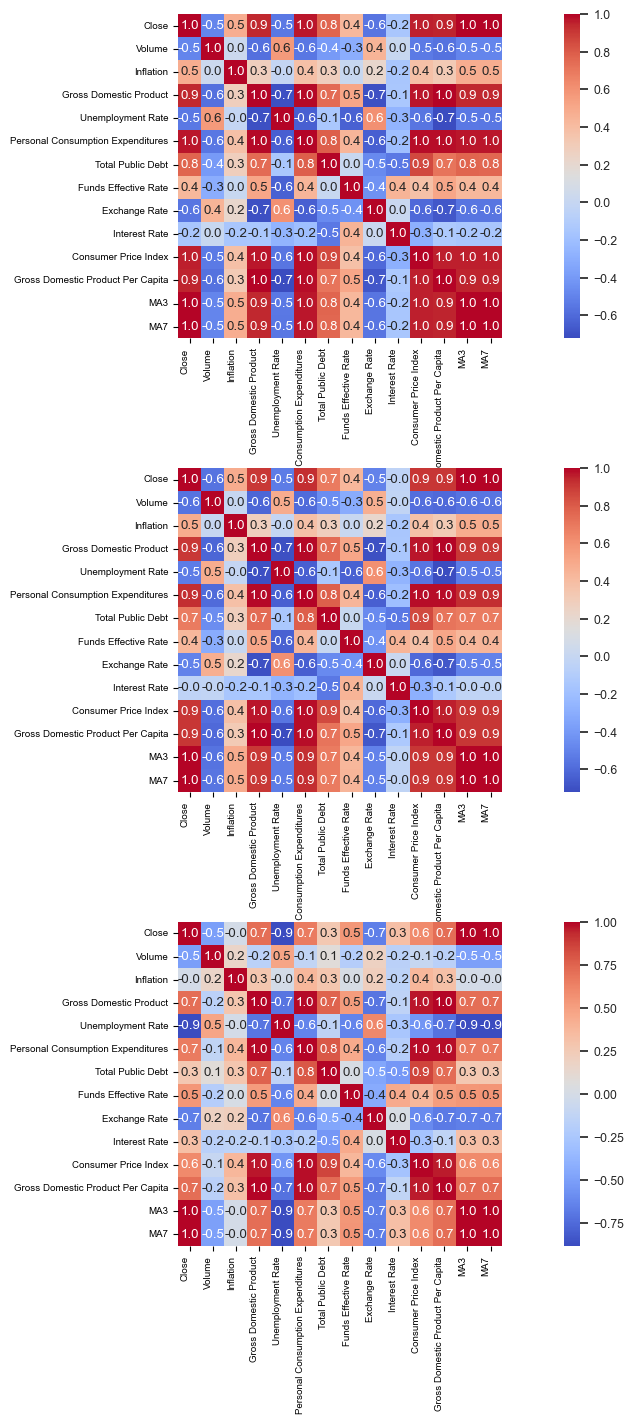

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
fig, axs = plt.subplots(3, 1,  figsize=(16, 16))

# Set the font scale
sns.set(font_scale=0.8)

# Visualize correlations
ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    correlation_matrix = ticker_df.corr()
    sns.heatmap(correlation_matrix, ax=axs[ind], annot=True, fmt=".1f", cmap="coolwarm", cbar=True, square=True)
    labels_x = axs[ind].get_xticklabels()
    axs[ind].set_xticklabels(labels_x, rotation=90, ha='right', fontsize=7) # Rotate the x-axis labels
    labels_y = axs[ind].get_yticklabels()
    axs[ind].set_yticklabels(labels_y, rotation=0, fontsize=7) # Rotate the y-axis labels
    ind += 1
    
plt.subplots_adjust(hspace=0.4) # Adjust this value to increase/decrease spacing

# Save a high quality heatmap
plt.savefig('heatmap_high_quality.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

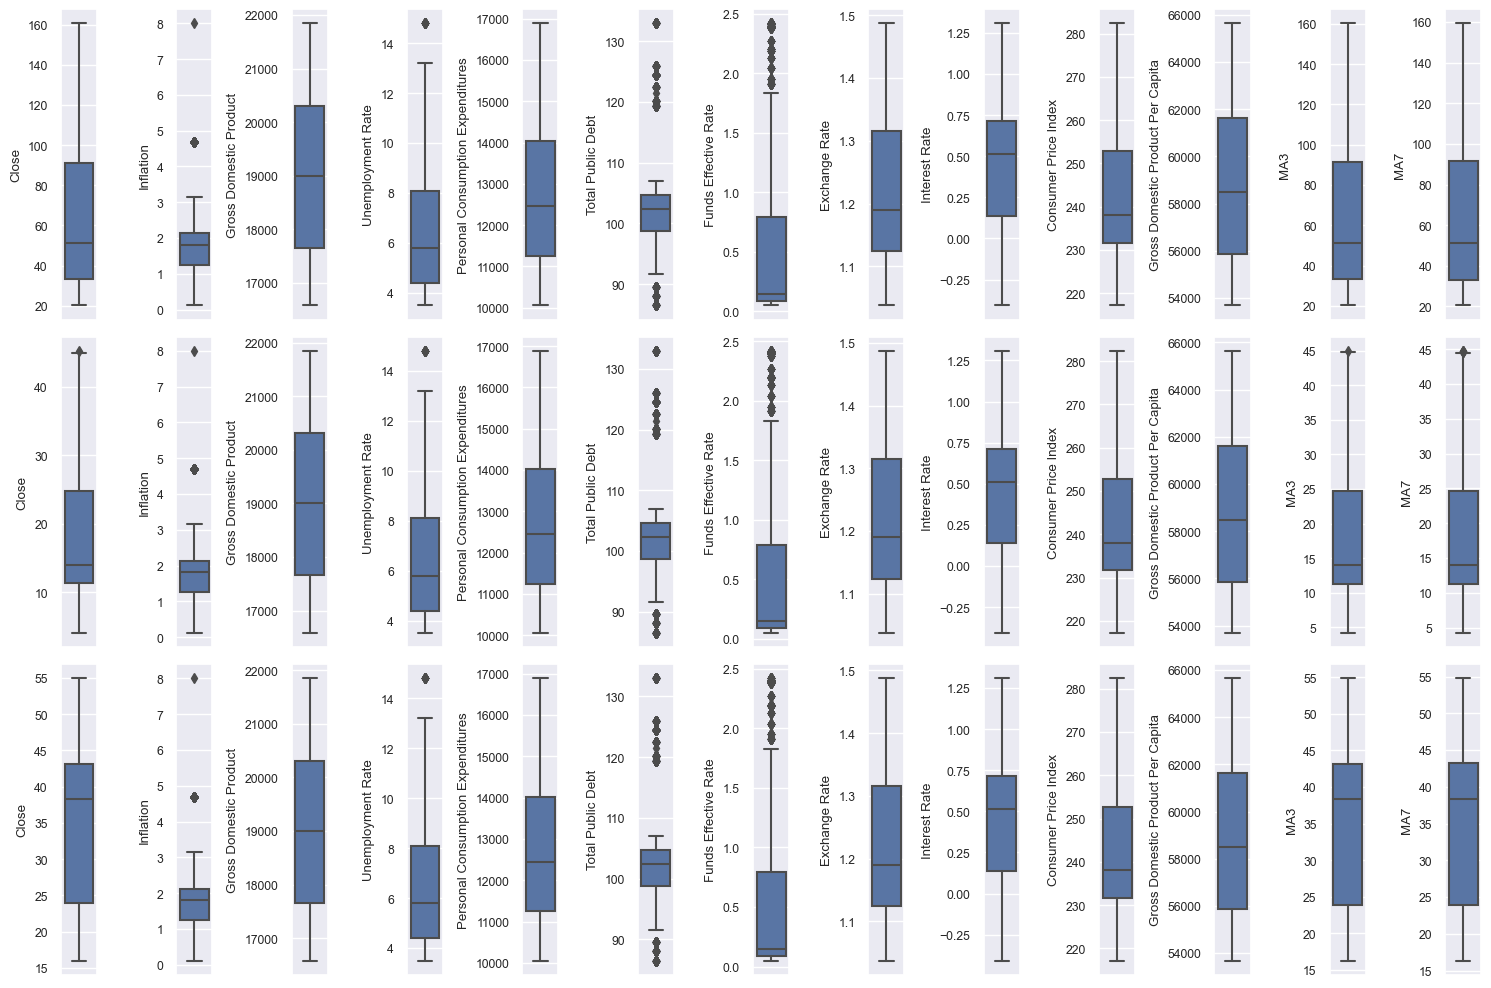

In [33]:
import seaborn as sns
# Select specific numerical columns
selected_columns = ['Close', 'Inflation', 'Gross Domestic Product', 'Unemployment Rate', 'Personal Consumption Expenditures', 
                    'Total Public Debt', 'Funds Effective Rate', 'Exchange Rate', 'Interest Rate', 'Consumer Price Index', 
                    'Gross Domestic Product Per Capita', 'MA3', 'MA7']

# checking the outlier with plotting boxplots for the selected numerical columns
plt.figure(figsize=(15, 10))
ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    for i, column in enumerate(selected_columns, 1):
        plt.subplot(3, len(selected_columns), (ind)*len(selected_columns)+i)
        sns.boxplot(y=ticker_df[column])
    ind += 1

plt.tight_layout()
plt.savefig('box_high_quality.png', dpi=300, bbox_inches='tight')
plt.show()

Keep Outliers:
Inherent Part of the Data: If outliers are a natural part of your time series data and likely to occur in future data (e.g., seasonal spikes in sales around holidays), it may be beneficial to keep them. Models trained with these outliers might better capture the underlying patterns, including these extreme but expected variations.

Informative for the Analysis: Outliers can sometimes carry important information about the system being modeled. Removing them without careful consideration could lead to overlooking valuable insights about anomalies or unusual events.

### Standardizatin of Data

In [34]:
from sklearn.preprocessing import RobustScaler
scaler_JPM = RobustScaler()
scaler_BAC = RobustScaler()
scaler_WFC = RobustScaler()
scaler_dict = {'JPM' : scaler_JPM, 'BAC' : scaler_BAC, 'WFC' : scaler_WFC} 
scaled_merged_df_ticker_dict = {}
for name,ticker_df in merged_df_ticker_dict.items():
    scaled_ticker_df = scaler_dict[name].fit_transform(ticker_df)
    scaled_merged_df_ticker_dict[name] = pd.DataFrame(scaled_ticker_df, columns=ticker_df.columns)

In [35]:
scaled_merged_df_ticker_dict['JPM']
#scaled_merged_df_ticker_dict['BAC']
#scaled_merged_df_ticker_dict['WFC']

,Close,Volume,Inflation,Gross Domestic Product,Unemployment Rate,Personal Consumption Expenditures,Total Public Debt,Funds Effective Rate,Exchange Rate,Interest Rate,Consumer Price Index,Gross Domestic Product Per Capita,MA3,MA7
0,-0.372954,1.377735,-0.198228,-0.915422,1.081081,-0.863481,-2.674308,-0.057143,1.318515,1.363108,-0.974020,-0.833420,-0.371798,-0.367252
1,-0.363006,1.798206,-0.198228,-0.915422,1.081081,-0.863481,-2.674308,-0.057143,1.309623,1.363108,-0.974020,-0.833420,-0.366855,-0.362343
2,-0.360129,0.812149,-0.198228,-0.915422,1.081081,-0.863481,-2.674308,-0.057143,1.310669,1.363108,-0.974020,-0.833420,-0.364255,-0.359760
3,-0.349701,2.065684,-0.198228,-0.915422,1.081081,-0.863481,-2.674308,-0.057143,1.263598,1.363108,-0.974020,-0.833420,-0.356552,-0.355896
4,-0.351020,1.205795,-0.198228,-0.915422,1.081081,-0.863481,-2.674308,-0.057143,1.286088,1.363108,-0.974020,-0.833420,-0.352582,-0.353838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,1.682628,-0.752361,3.322464,1.076988,-0.513514,1.566728,3.003302,-0.100000,-0.305439,-0.730212,2.027924,1.242756,1.660970,1.632999
3167,1.681332,-0.748221,3.322464,1.076988,-0.513514,1.566728,3.003302,-0.100000,-0.293410,-0.730212,2.027924,1.242756,1.667944,1.643548
3168,1.680037,-0.708037,3.322464,1.076988,-0.513514,1.566728,3.003302,-0.100000,-0.303347,-0.730212,2.027924,1.242756,1.669661,1.649005
3169,1.677932,-0.791601,3.322464,1.076988,-0.513514,1.566728,3.003302,-0.100000,-0.303347,-0.730212,2.027924,1.242756,1.668105,1.652772


### Splitting the Data
Split the scaled merged data into three sets for training, validation, and testing. 
Splitting the data into three sets for training, validation, and testing for evaluating the performance of the machine learning or deep learning model.

In this study:
* The training set is used to train the model on the given data. (80% from dataset)
* The validation set is used to tune the hyperparameters of the model and prevent overfitting. (10% from traning set)
* The testing set is used to evaluate the final performance of the model on unseen data. (20% from dataset)

By using separate sets for training, validation, and testing, we can ensure that the model is not overfitting and is generalizing well to new data.

* The shuffle argument is set to False to preserve the time order of the data.
* The random_state argument sets the random seed for reproducibility.



In [36]:
from sklearn.model_selection import train_test_split

X_train_dict = {}
X_test_dict = {}
X_val_dict = {}
Y_train_dict = {}
Y_test_dict = {}
Y_val_dict = {}
for name,ticker_df in scaled_merged_df_ticker_dict.items():
    X_train, X_test = train_test_split(ticker_df, test_size=0.2, random_state=42, shuffle=False)
    Y_train, Y_test = train_test_split(ticker_df['Close'], test_size=0.2, random_state=42, shuffle=False)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=False)
    X_train_dict[name] = X_train
    X_test_dict[name] = X_test
    X_val_dict[name] = X_val
    Y_train_dict[name] = Y_train
    Y_test_dict[name] = Y_test
    Y_val_dict[name] = Y_val

### Reshaping the Data
It is nessessaryy to reshape the data into a 3D matrix with the shape as (number of timesteps, number of the features, number of samples).

In [37]:
for name in scaled_merged_df_ticker_dict.keys():
    X_train_dict[name] = X_train_dict[name].values.reshape(X_train_dict[name].values.shape[0], X_train_dict[name].values.shape[1], 1)
    X_test_dict[name] = X_test_dict[name].values.reshape(X_test_dict[name].values.shape[0], X_test_dict[name].values.shape[1], 1)
    X_val_dict[name] = X_val_dict[name].values.reshape(X_val_dict[name].values.shape[0], X_val_dict[name].values.shape[1], 1)
    Y_train_dict[name] = Y_train_dict[name].values.reshape(Y_train_dict[name].values.shape[0], 1)
    Y_test_dict[name] = Y_test_dict[name].values.reshape(Y_test_dict[name].values.shape[0], 1)
    Y_val_dict[name] = Y_val_dict[name].values.reshape(Y_val_dict[name].values.shape[0], 1)

### Shifting the Target


Our shift_target function takes a 2D NumPy array and moves all its elements down by one row. We remove the first row and then duplicate the last row at the end. This gives us a new array with elements shifted down, and the last row twice.

In [38]:
def shift_target(arr):
    arr = np.delete(arr, 0, axis=0)
    last_val = arr[-1]
    new_row = np.array([last_val])
    arr = np.concatenate((arr, new_row), axis=0)
    arr = np.delete(arr, 0, axis=0)
    last_val = arr[-1]
    new_row = np.array([last_val])
    arr = np.concatenate((arr, new_row), axis=0)
    return arr

for name in scaled_merged_df_ticker_dict.keys():
    Y_train_dict[name] = shift_target(Y_train_dict[name])
    Y_test_dict[name] = shift_target(Y_test_dict[name])
    Y_val_dict[name] = shift_target(Y_val_dict[name])

# Train & Evaluation of the Models

## Machine Learning Models

### 1.Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
def train_ridge_regression(X_train1, Y_train1, ticker_df, name):
    model_Ridge = Ridge()

    hyperparameters = {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }

    grid_search_Ridge = GridSearchCV(model_Ridge, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_Ridge.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    ticker_df_Ridge = ticker_df.copy()
    ticker_df_Ridge['Close'] = grid_search_Ridge.predict(ticker_df_Ridge.values)

    Predict_Ridge = scaler_dict[name].inverse_transform(ticker_df_Ridge)
    Predict_Ridge = pd.DataFrame(Predict_Ridge, columns=ticker_df.columns)
    Predict_Ridge = Predict_Ridge['Close']
    
    mse = mean_squared_error(merged_df_ticker_dict[name]['Close'].values, Predict_Ridge.values)
    rmse = mean_squared_error(merged_df_ticker_dict[name]['Close'].values, Predict_Ridge.values, squared=False)
    r2 = r2_score(merged_df_ticker_dict[name]['Close'].values, Predict_Ridge.values)
    
    print(f"\n {name}: ")
    print(f'Mean Squared Error on validation set: {mse}')
    print(f'Root Mean Squared Error on validation set: {rmse}')
    print(f'R-squared score on validation set: {r2}')
    
    return rmse, mse, r2, Predict_Ridge, grid_search_Ridge
rmse_Ridge_JPM, mse_Ridge_JPM, r2_Ridge_JPM, Predict_Ridge_JPM, grid_search_Ridge_JPM = train_ridge_regression(X_train_dict['JPM'], Y_train_dict['JPM'], scaled_merged_df_ticker_dict['JPM'], 'JPM')
rmse_Ridge_BAC, mse_Ridge_BAC, r2_Ridge_BAC, Predict_Ridge_BAC, grid_search_Ridge_BAC = train_ridge_regression(X_train_dict['BAC'], Y_train_dict['BAC'], scaled_merged_df_ticker_dict['BAC'], 'BAC')
rmse_Ridge_WFC, mse_Ridge_WFC, r2_Ridge_WFC, Predict_Ridge_WFC, grid_search_Ridge_WFC = train_ridge_regression(X_train_dict['WFC'], Y_train_dict['WFC'], scaled_merged_df_ticker_dict['WFC'], 'WFC')
Predict_Ridge_dict = {}
Predict_Ridge_dict['JPM'] = Predict_Ridge_JPM
Predict_Ridge_dict['BAC'] = Predict_Ridge_BAC
Predict_Ridge_dict['WFC'] = Predict_Ridge_WFC


 JPM: 
Mean Squared Error on validation set: 0.15102525415882326
Root Mean Squared Error on validation set: 0.3886196780385976
R-squared score on validation set: 0.9998828466939216

 BAC: 
Mean Squared Error on validation set: 0.010320231903107395
Root Mean Squared Error on validation set: 0.10158854218418234
R-squared score on validation set: 0.9998748395518602

 WFC: 
Mean Squared Error on validation set: 0.09997733602998539
Root Mean Squared Error on validation set: 0.31619192910317206
R-squared score on validation set: 0.9990463548708161


### Ploting the Predictions of Ridge

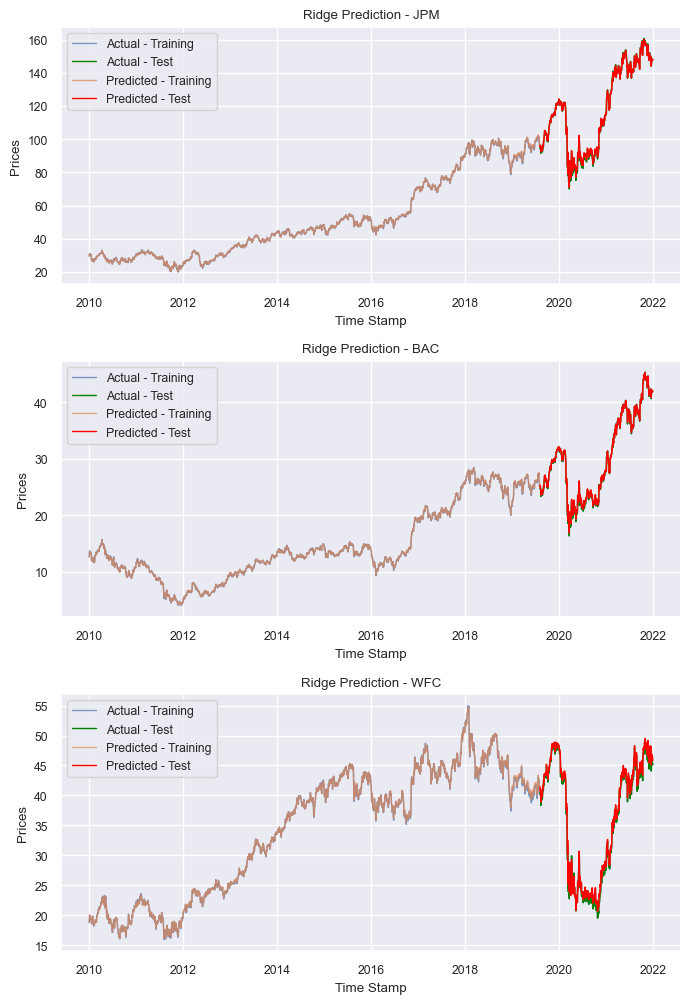

In [40]:
import mplcursors
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=1)

    axs[ind].plot(ticker_df.index, Predict_Ridge_dict[name],label="Predicted - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_Ridge_dict[name][-635:], label="Predicted - Test", color='red', linewidth=1)

    axs[ind].set_title(f'Ridge Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=False)

plt.show()

### Plotting the Features

The code extracts the coefficients or feature importance values from a linear regression model and creates a bar plot to visualize these values. The plot helps in understanding the relative importance of different features in the model's predictions.

Feature Importance:
Feature 1: 0.9083134271116596
Feature 2: 1.6793500353342607e-05
Feature 3: -0.0012295885242370958
Feature 4: 0.04641301277326627
Feature 5: 0.015330772855235484
Feature 6: 0.022780110052956867
Feature 7: -0.001923858549610033
Feature 8: 0.0034673264498482964
Feature 9: 0.0007056411750802138
Feature 10: 0.0004202694367522233
Feature 11: 0.004931048462833931
Feature 12: -0.032768036526396906
Feature 13: 0.07019938119298609
Feature 14: -0.004435647123485636

Feature Names:
Feature 1: Close
Feature 2: Volume
Feature 3: Inflation
Feature 4: Gross Domestic Product
Feature 5: Unemployment Rate
Feature 6: Personal Consumption Expenditures
Feature 7: Total Public Debt
Feature 8: Funds Effective Rate
Feature 9: Exchange Rate
Feature 10: Interest Rate
Feature 11: Consumer Price Index
Feature 12: Gross Domestic Product Per Capita
Feature 13: MA3
Feature 14: MA7


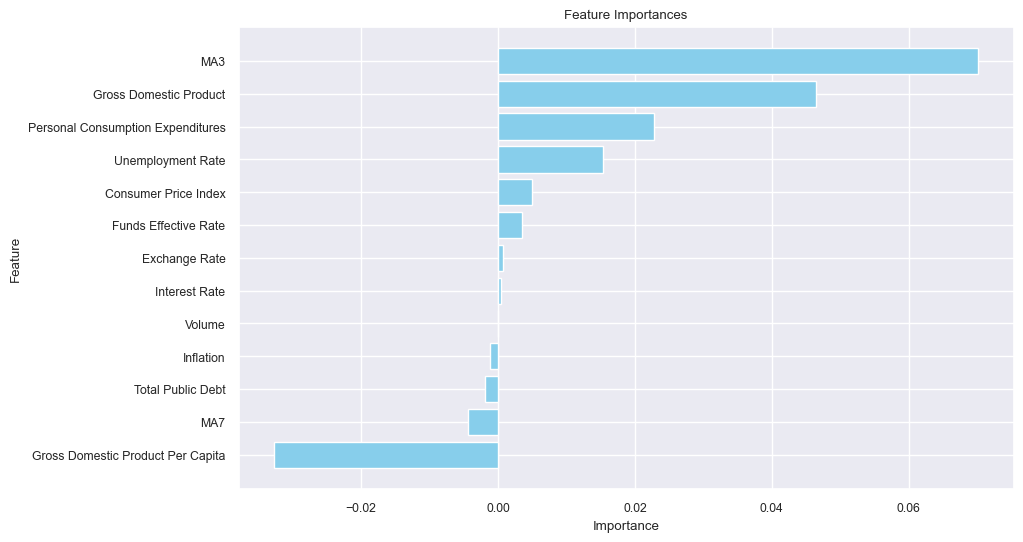

In [94]:
# Extracting feature importance for JPM
feature_importance = grid_search_Ridge_JPM.best_estimator_.coef_

print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

print("\nFeature Names:")
for i, feature_name in enumerate(merged_df_ticker_dict['JPM'].columns):
    print(f"Feature {i+1}: {feature_name}")

# Remove "Close" from feature importance values and feature names
feature_importance = [1.679427521959049e-05, -0.001229585072461231, 0.04641327709238915,
                      0.015330735254214948, 0.022779951852615853, -0.0019238660245989821,
                      0.0034673320002244967, 0.0007056407921844241, 0.00042026757169954615,
                      0.0049310658577334555, -0.0327682102259022, 0.0702007977751264,
                      -0.004436202371411424]

feature_names = ['Volume', 'Inflation', 'Gross Domestic Product', 'Unemployment Rate',
                 'Personal Consumption Expenditures', 'Total Public Debt', 'Funds Effective Rate',
                 'Exchange Rate', 'Interest Rate', 'Consumer Price Index', 'Gross Domestic Product Per Capita',
                 'MA3', 'MA7']

# Sort feature names and importance values together based on importance values
sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Unpack sorted feature names and importance values
sorted_feature_names, sorted_feature_importance = zip(*sorted_features)

# Plotting the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


### 2. Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
def train_lasso_regression(X_train1, Y_train1, ticker_df, name):
    model_Lasso = Lasso()

    hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    grid_search_Lasso = GridSearchCV(model_Lasso, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_Lasso.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    ticker_df_Lasso = ticker_df.copy()
    ticker_df_Lasso['Close'] = grid_search_Lasso.predict(ticker_df_Lasso.values)

    Predict_Lasso = scaler_dict[name].inverse_transform(ticker_df_Lasso)
    Predict_Lasso = pd.DataFrame(Predict_Lasso, columns=ticker_df.columns)
    Predict_Lasso = Predict_Lasso['Close']

    mse = mean_squared_error(merged_df_ticker_dict[name]['Close'].values, Predict_Lasso.values)
    rmse = mean_squared_error(merged_df_ticker_dict[name]['Close'].values, Predict_Lasso.values, squared=False)
    r2 = r2_score(merged_df_ticker_dict[name]['Close'].values, Predict_Lasso.values)

    print(f"\n {name}: ")
    print(f'Mean Squared Error on validation set: {mse}')
    print(f'Root Mean Squared Error on validation set: {rmse}')
    print(f'R-squared score on validation set: {r2}')

    return rmse, mse, r2, Predict_Lasso, grid_search_Lasso
rmse_Lasso_JPM, mse_Lasso_JPM, r2_Lasso_JPM, Predict_Lasso_JPM, grid_search_Lasso_JPM = train_lasso_regression(X_train_dict['JPM'], Y_train_dict['JPM'], scaled_merged_df_ticker_dict['JPM'], 'JPM')
rmse_Lasso_BAC, mse_Lasso_BAC, r2_Lasso_BAC, Predict_Lasso_BAC, grid_search_Lasso_BAC = train_lasso_regression(X_train_dict['BAC'], Y_train_dict['BAC'], scaled_merged_df_ticker_dict['BAC'], 'BAC')
rmse_Lasso_WFC, mse_Lasso_WFC, r2_Lasso_WFC, Predict_Lasso_WFC, grid_search_Lasso_WFC = train_lasso_regression(X_train_dict['WFC'], Y_train_dict['WFC'], scaled_merged_df_ticker_dict['WFC'], 'WFC')
Predict_Lasso_dict = {}
Predict_Lasso_dict['JPM'] = Predict_Lasso_JPM
Predict_Lasso_dict['BAC'] = Predict_Lasso_BAC
Predict_Lasso_dict['WFC'] = Predict_Lasso_WFC


 JPM: 
Mean Squared Error on validation set: 8.90851382164204
Root Mean Squared Error on validation set: 2.984713356696425
R-squared score on validation set: 0.9930894878988046

 BAC: 
Mean Squared Error on validation set: 0.027814399669857583
Root Mean Squared Error on validation set: 0.16677649615535634
R-squared score on validation set: 0.9996626759204537

 WFC: 
Mean Squared Error on validation set: 0.016015231104290734
Root Mean Squared Error on validation set: 0.12655129831135964
R-squared score on validation set: 0.9998472369064647


### Ploting the Lasso Predictions

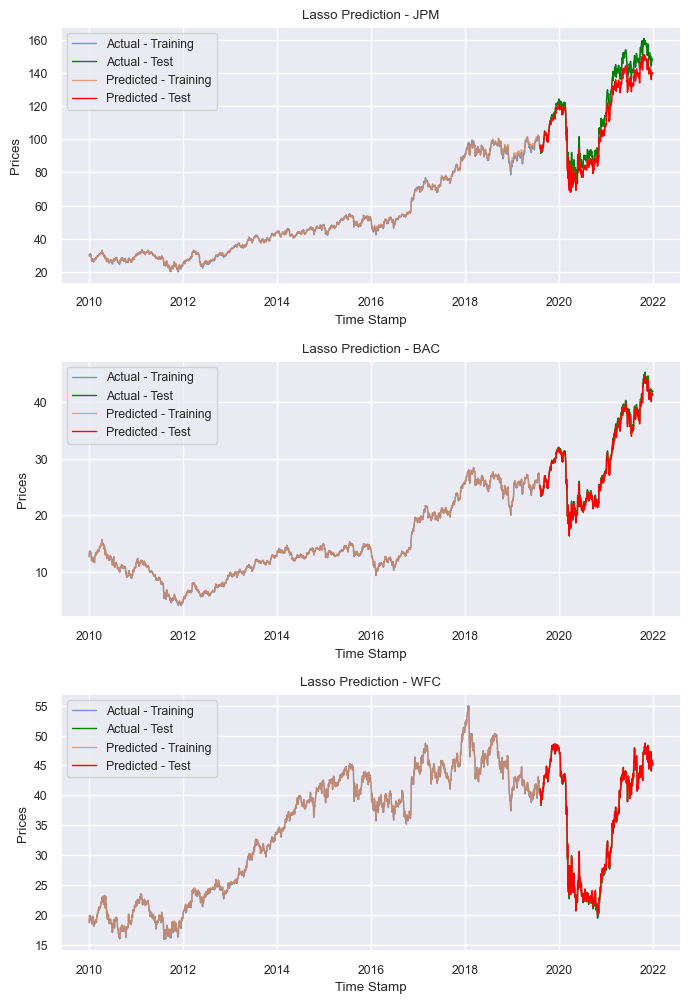

In [45]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=1)

    axs[ind].plot(ticker_df.index, Predict_Lasso_dict[name],label="Predicted - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_Lasso_dict[name][-635:], label="Predicted - Test", color='red', linewidth=1)

    axs[ind].set_title(f'Lasso Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=False)

plt.show()

### 3. Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
def train_random_forest_regression(X_train1, Y_train1, ticker_df, name):
    model_rf = RandomForestRegressor()
    #model_rf = RandomForestRegressor(random_state=42)

    hyperparameters = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 10, 20],       # Maximum depth of the tree      # Minimum number of samples required to be at a leaf node
    }

    grid_search_rf = GridSearchCV(model_rf, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_rf.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    ticker_df_rf = ticker_df.copy()
    ticker_df_rf['Close'] = grid_search_rf.predict(ticker_df_rf.values)

    Predict_rf = scaler_dict[name].inverse_transform(ticker_df_rf)
    Predict_rf = pd.DataFrame(Predict_rf, columns=ticker_df.columns)
    Predict_rf = Predict_rf['Close']

    mse = mean_squared_error(merged_df_ticker_dict[name]['Close'].values, Predict_rf.values)
    rmse = mean_squared_error(merged_df_ticker_dict[name]['Close'].values, Predict_rf.values, squared=False)
    r2 = r2_score(merged_df_ticker_dict[name]['Close'].values, Predict_rf.values)

    print(f"\n {name}: ")
    print(f'Mean Squared Error on validation set: {mse}')
    print(f'Root Mean Squared Error on validation set: {rmse}')
    print(f'R-squared score on validation set: {r2}')


    return rmse, mse, r2, Predict_rf, grid_search_rf

# Assuming scaler and JPM_merged_df are defined elsewhere in the code
rmse_rf_JPM, mse_rf_JPM, r2_rf_JPM, Predict_rf_JPM, grid_search_rf_JPM = train_random_forest_regression(X_train_dict['JPM'], Y_train_dict['JPM'], scaled_merged_df_ticker_dict['JPM'], 'JPM')
rmse_rf_BAC, mse_rf_BAC, r2_rf_BAC, Predict_rf_BAC, grid_search_rf_BAC = train_random_forest_regression(X_train_dict['BAC'], Y_train_dict['BAC'], scaled_merged_df_ticker_dict['BAC'], 'BAC')
rmse_rf_WFC, mse_rf_WFC, r2_rf_WFC, Predict_rf_WFC, grid_search_rf_WFC = train_random_forest_regression(X_train_dict['WFC'], Y_train_dict['WFC'], scaled_merged_df_ticker_dict['WFC'], 'WFC')
Predict_rf_dict = {}
Predict_rf_dict['JPM'] = Predict_rf_JPM
Predict_rf_dict['BAC'] = Predict_rf_BAC
Predict_rf_dict['WFC'] = Predict_rf_WFC


 JPM: 
Mean Squared Error on validation set: 204.21802981061802
Root Mean Squared Error on validation set: 14.290487388840802
R-squared score on validation set: 0.8415839954291695

 BAC: 
Mean Squared Error on validation set: 11.080337408452486
Root Mean Squared Error on validation set: 3.328714077305602
R-squared score on validation set: 0.8656212371385555

 WFC: 
Mean Squared Error on validation set: 0.25830107488686566
Root Mean Squared Error on validation set: 0.5082332878579143
R-squared score on validation set: 0.9975361659781078


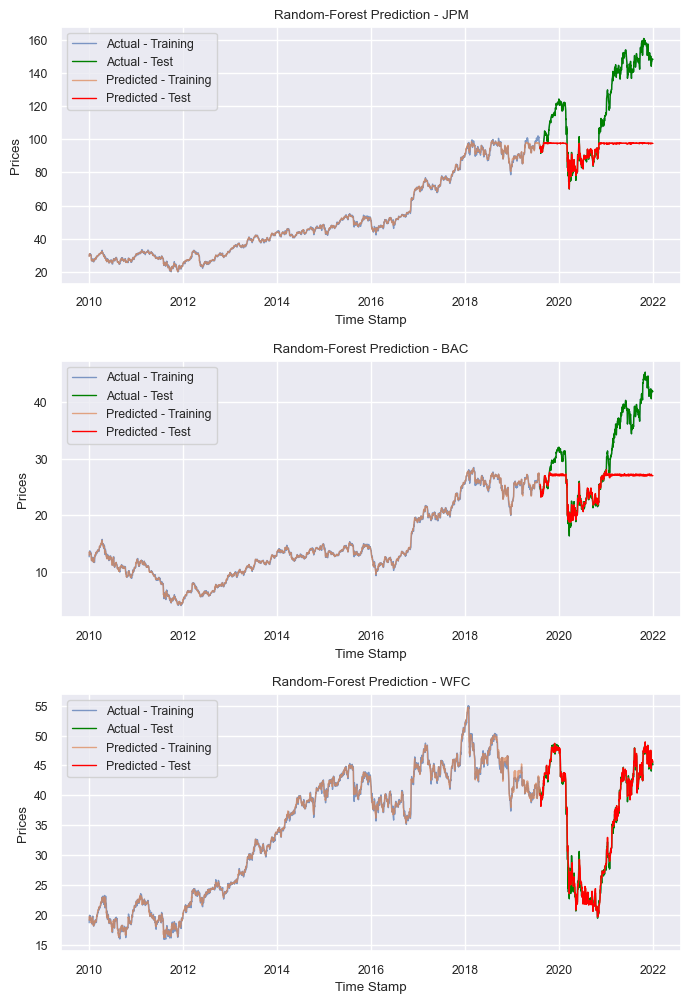

In [47]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=1)

    axs[ind].plot(ticker_df.index, Predict_rf_dict[name],label="Predicted - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_rf_dict[name][-635:], label="Predicted - Test", color='red', linewidth=1)

    axs[ind].set_title(f'Random-Forest Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=False)

plt.show()

### 4. XGBoost Regression

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def train_xgboost_regression(X_train, Y_train, scaled_ticker_df, scaler_dict, ticker_df, name):
    model_XGB = XGBRegressor(objective='reg:squarederror')

    hyperparameters = {
        'n_estimators': [20, 30, 40],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 9]
    }

    grid_search_XGB = GridSearchCV(model_XGB, hyperparameters, cv=5, scoring='neg_mean_squared_error')
    grid_search_XGB.fit(np.squeeze(X_train), np.squeeze(Y_train))

    scaled_ticker_df['Close'] = grid_search_XGB.predict(scaled_ticker_df.values)

    Predict_XGB = scaler_dict[name].inverse_transform(scaled_ticker_df)
    Predict_XGB = pd.DataFrame(Predict_XGB, columns=scaled_ticker_df.columns)
    Predict_XGB = Predict_XGB['Close']

    # Ensure that the true values and predictions have the same length
    # and that there are no NaN values in either.
    aligned_true_values = ticker_df['Close'].iloc[-len(Predict_XGB):].dropna()
    Predict_XGB_aligned = Predict_XGB.iloc[-len(aligned_true_values):].dropna()

    mse = mean_squared_error(aligned_true_values, Predict_XGB_aligned)
    rmse = mean_squared_error(aligned_true_values, Predict_XGB_aligned, squared=False)
    r2 = r2_score(aligned_true_values, Predict_XGB_aligned)
    
# Now calculate r2 using aligned_true_values_for_r2 and Predict_XGB_aligned

    print(f"\n {name}: ")
    print(f'Mean Squared Error on validation set: {mse}')
    print(f'Root Mean Squared Error on validation set: {rmse}')
    print(f'R-squared score on validation set: {r2}')

    return rmse, mse, r2, Predict_XGB_aligned, grid_search_XGB

# Make sure the following variables are correctly assigned before calling the function:
# X_train1, Y_train1, scaled_JPM_merged_df, scaler, merged_df

# Call the function with the correct parameters
rmse_XGB_JPM, mse_XGB_JPM, r2_XGB_JPM, Predict_XGB_JPM, grid_search_XGB_JPM = train_xgboost_regression(X_train_dict['JPM'], Y_train_dict['JPM'], scaled_merged_df_ticker_dict['JPM'], scaler_dict, merged_df_ticker_dict['JPM'], 'JPM')
rmse_XGB_BAC, mse_XGB_BAC, r2_XGB_BAC, Predict_XGB_BAC, grid_search_XGB_BAC = train_xgboost_regression(X_train_dict['BAC'], Y_train_dict['BAC'], scaled_merged_df_ticker_dict['BAC'], scaler_dict, merged_df_ticker_dict['BAC'], 'BAC')
rmse_XGB_WFC, mse_XGB_WFC, r2_XGB_WFC, Predict_XGB_WFC, grid_search_XGB_WFC = train_xgboost_regression(X_train_dict['WFC'], Y_train_dict['WFC'], scaled_merged_df_ticker_dict['WFC'], scaler_dict, merged_df_ticker_dict['WFC'], 'WFC')
Predict_XGB_dict = {}
Predict_XGB_dict['JPM'] = Predict_XGB_JPM
Predict_XGB_dict['BAC'] = Predict_XGB_BAC
Predict_XGB_dict['WFC'] = Predict_XGB_WFC


 JPM: 
Mean Squared Error on validation set: 256.6525048088128
Root Mean Squared Error on validation set: 16.020377798566823
R-squared score on validation set: 0.8009095258992944

 BAC: 
Mean Squared Error on validation set: 13.048722521922514
Root Mean Squared Error on validation set: 3.612301554677089
R-squared score on validation set: 0.8417492965439299

 WFC: 
Mean Squared Error on validation set: 0.5715097905000438
Root Mean Squared Error on validation set: 0.7559826654758982
R-squared score on validation set: 0.9945485892139813


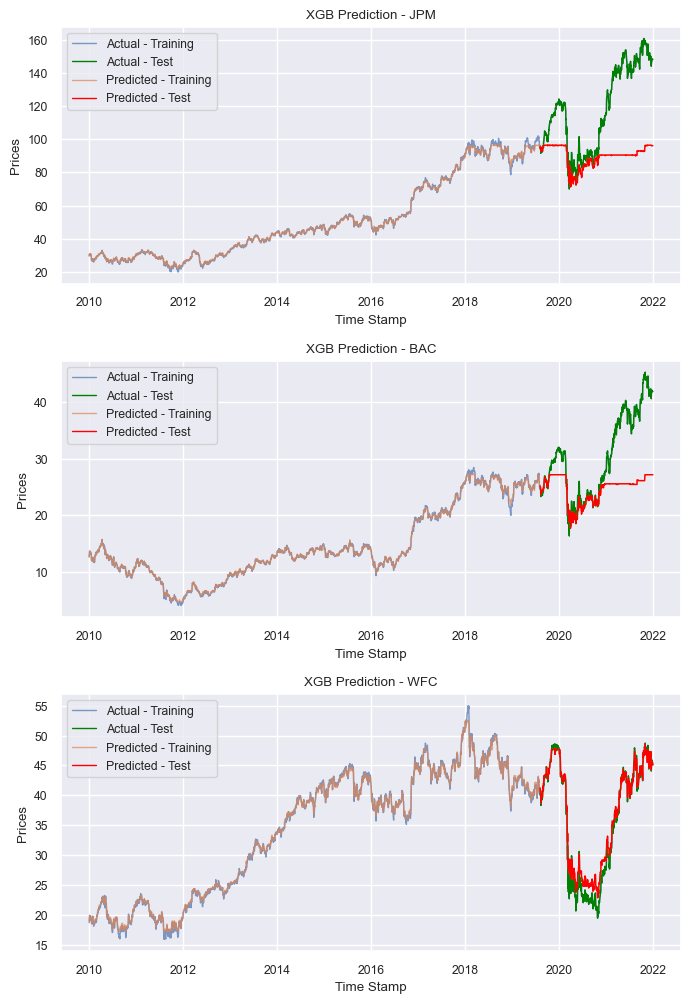

In [49]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=1)

    axs[ind].plot(ticker_df.index, Predict_XGB_dict[name],label="Predicted - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_XGB_dict[name][-635:], label="Predicted - Test", color='red', linewidth=1)

    axs[ind].set_title(f'XGB Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=False)

plt.show()

### 5. DecisionTree Regression

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

def train_decision_tree_regression(X_train, Y_train, scaled_JPM_merged_df, scaler_dict, JPM_merged_df, name):
    model_DTR = DecisionTreeRegressor()
    
    hyperparameters = {
        'max_depth': [2, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10]
    }
    
    grid_search_DTR = GridSearchCV(model_DTR, hyperparameters, cv=5, scoring='neg_mean_squared_error')
    
    # Fit the model on the training data
    grid_search_DTR.fit(np.squeeze(X_train), np.squeeze(Y_train))
    
    # Copy the scaled data to make predictions
    scaled_JPM_merged_df_DTR = scaled_JPM_merged_df.copy()
    
    # Make predictions on the scaled data
    scaled_JPM_merged_df_DTR['Close'] = grid_search_DTR.predict(scaled_JPM_merged_df_DTR)
    
    # Inverse transform the predictions
    Predict_DTR = scaler_dict[name].inverse_transform(scaled_JPM_merged_df_DTR)
    Predict_DTR = pd.DataFrame(Predict_DTR, columns=scaled_JPM_merged_df.columns)
    Predict_DTR = Predict_DTR['Close']
    
    # Align the lengths of the predictions and actual values
    # Ensure that the 'Close' column in merged_df has the same length as Predict_DTR
    aligned_true_values = merged_df['Close'].iloc[-len(Predict_DTR):]
    
    # Check and handle NaN values if they exist
    mask = ~np.isnan(aligned_true_values) & ~np.isnan(Predict_DTR)
    aligned_true_values_masked = aligned_true_values[mask]
    Predict_DTR_masked = Predict_DTR[mask]
    
    # Calculate MSE and RMSE with arrays of the same length
    mse = mean_squared_error(aligned_true_values_masked, Predict_DTR_masked)
    rmse = mean_squared_error(aligned_true_values_masked, Predict_DTR_masked, squared=False)
    r2 = r2_score(aligned_true_values_masked, Predict_DTR_masked.values)

    print(f"\n {name}: ")
    print(f'Mean Squared Error on validation set: {mse}')
    print(f'Root Mean Squared Error on validation set: {rmse}')
    print(f'R-squared score on validation set: {r2}')
    
    return rmse, mse, r2, Predict_DTR, grid_search_DTR

# Call the function with the correct parameters
rmse_DTR_JPM, mse_DTR_JPM, r2_DTR_JPM, Predict_DTR_JPM, grid_search_DTR_JPM = train_decision_tree_regression(X_train_dict['JPM'], Y_train_dict['JPM'], scaled_merged_df_ticker_dict['JPM'], scaler_dict, merged_df_ticker_dict['JPM'], 'JPM')
rmse_DTR_BAC, mse_DTR_BAC, r2_DTR_BAC, Predict_DTR_BAC, grid_search_DTR_BAC = train_decision_tree_regression(X_train_dict['BAC'], Y_train_dict['BAC'], scaled_merged_df_ticker_dict['BAC'], scaler_dict, merged_df_ticker_dict['BAC'], 'BAC')
rmse_DTR_WFC, mse_DTR_WFC, r2_DTR_WFC, Predict_DTR_WFC, grid_search_DTR_WFC = train_decision_tree_regression(X_train_dict['WFC'], Y_train_dict['WFC'], scaled_merged_df_ticker_dict['WFC'], scaler_dict, merged_df_ticker_dict['WFC'], 'WFC')
Predict_DTR_dict = {}
Predict_DTR_dict['JPM'] = Predict_DTR_JPM
Predict_DTR_dict['BAC'] = Predict_DTR_BAC
Predict_DTR_dict['WFC'] = Predict_DTR_WFC


 JPM: 
Mean Squared Error on validation set: 1027.4704101462441
Root Mean Squared Error on validation set: 32.05417929297589
R-squared score on validation set: -8.796853257427786

 BAC: 
Mean Squared Error on validation set: 405.5742582531807
Root Mean Squared Error on validation set: 20.138874304518133
R-squared score on validation set: -2.867120117387116

 WFC: 
Mean Squared Error on validation set: 38.03119204973373
Root Mean Squared Error on validation set: 6.1669434933144744
R-squared score on validation set: 0.63737543773814


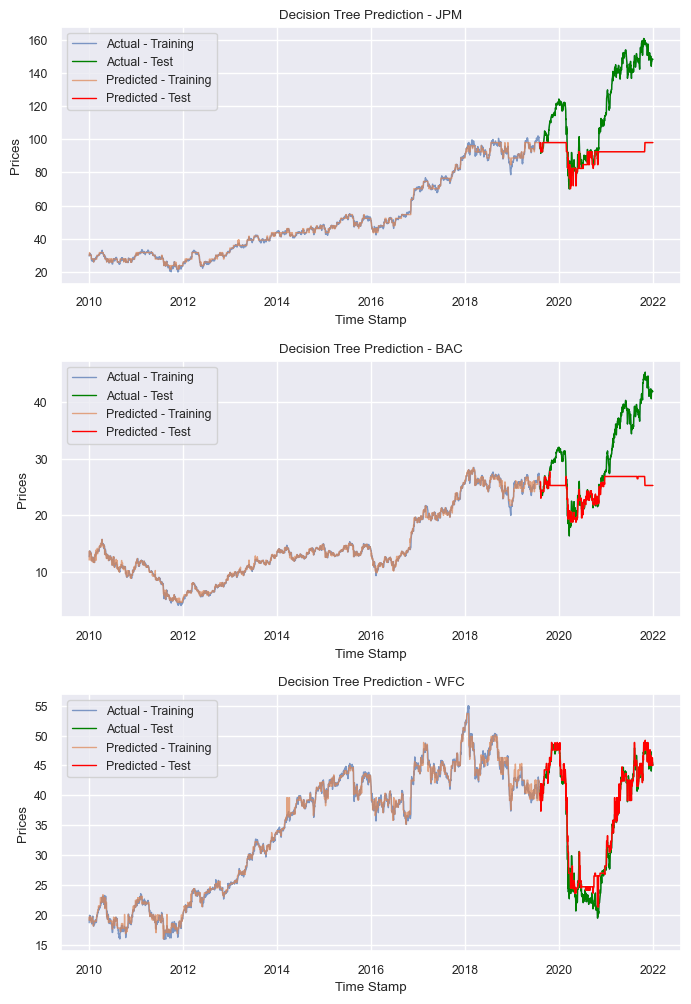

In [51]:
import matplotlib.pyplot as plt

# Assuming that 'rmse_DTR, mse_DTR, Predict_DTR, grid_search_DTR' have been
# obtained from the previous function call and that 'merged_df' is the original
# DataFrame containing the actual 'Close' prices.

# Align the true 'Close' values from 'merged_df' with 'Predict_DTR'
# Note: This assumes that 'Predict_DTR' is already aligned with the correct dates
# and contains no NaN values after the previous steps.

fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=1)

    axs[ind].plot(ticker_df.index, Predict_DTR_dict[name],label="Predicted - Training", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_DTR_dict[name][-635:], label="Predicted - Test", color='red', linewidth=1)

    axs[ind].set_title(f'Decision Tree Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=False)

plt.show()



### Comparing the Machine Learning models

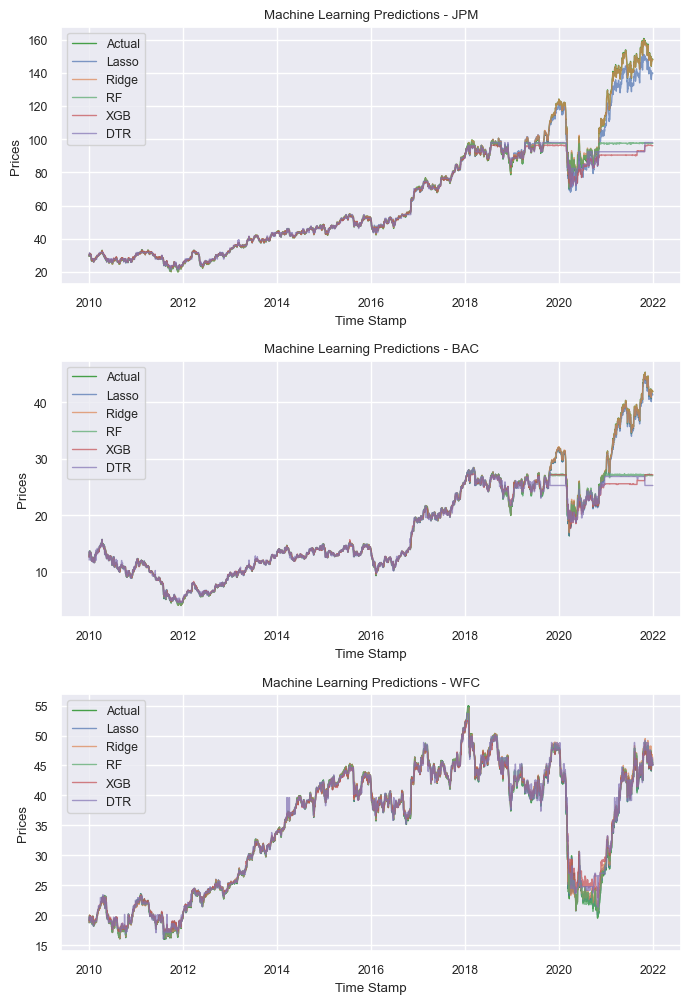

In [52]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual", color='green', linewidth=1, alpha=0.7)

    axs[ind].plot(ticker_df.index, Predict_Lasso_dict[name], label="Lasso", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index, Predict_Ridge_dict[name], label="Ridge", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index, Predict_rf_dict[name], label="RF", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index, Predict_XGB_dict[name], label="XGB", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index, Predict_DTR_dict[name], label="DTR", linewidth=1, alpha=0.7)


    axs[ind].set_title(f'Machine Learning Predictions - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=True)
plt.savefig('ML prediction_high_quality.png', dpi=300, bbox_inches='tight')

plt.show()

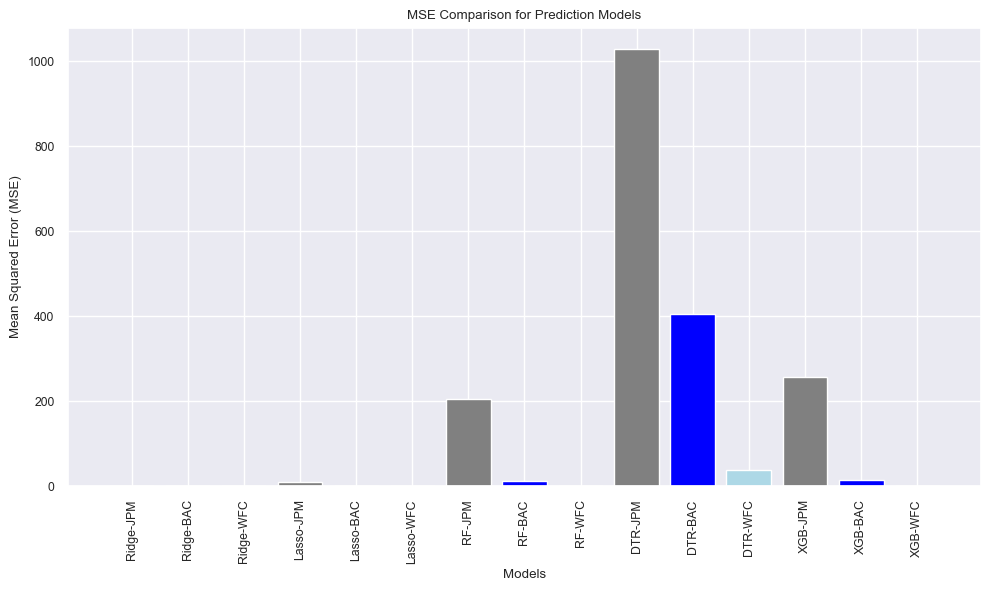

In [53]:
models_name = ['Ridge-JPM', 'Ridge-BAC', 'Ridge-WFC',
               'Lasso-JPM', 'Lasso-BAC', 'Lasso-WFC',
               'RF-JPM', 'RF-BAC', 'RF-WFC',
               'DTR-JPM', 'DTR-BAC', 'DTR-WFC',
               'XGB-JPM', 'XGB-BAC', 'XGB-WFC']
mse_values = [mse_Ridge_JPM, mse_Ridge_BAC, mse_Ridge_WFC,
              mse_Lasso_JPM, mse_Lasso_BAC, mse_Lasso_WFC,
              mse_rf_JPM, mse_rf_BAC, mse_rf_WFC,
              mse_DTR_JPM, mse_DTR_BAC, mse_DTR_WFC,
              mse_XGB_JPM, mse_XGB_BAC, mse_XGB_WFC]

color = ['grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue']

plt.figure(figsize=(10, 6))
plt.bar(models_name, mse_values, color=color)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Prediction Models')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

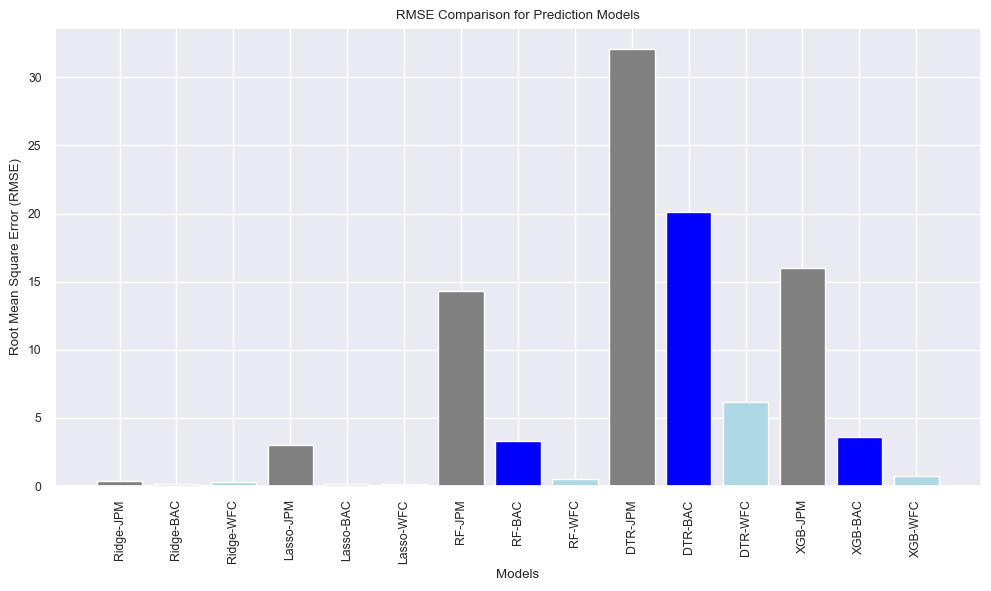

In [54]:
rmse_values = [rmse_Ridge_JPM, rmse_Ridge_BAC, rmse_Ridge_WFC,
              rmse_Lasso_JPM, rmse_Lasso_BAC, rmse_Lasso_WFC,
              rmse_rf_JPM, rmse_rf_BAC, rmse_rf_WFC,
              rmse_DTR_JPM, rmse_DTR_BAC, rmse_DTR_WFC,
              rmse_XGB_JPM, rmse_XGB_BAC, rmse_XGB_WFC]

plt.figure(figsize=(10, 6))
plt.bar(models_name, rmse_values, color=color)
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE Comparison for Prediction Models')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Deep Learning Models

### Long Short-Term Memory (LSTM)

In [55]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model
    """

    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(14, 1)))
    model.add(Dropout(0.4))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.4))
    
    model.add(LSTM(units=50))
    model.add(Dropout(0.4))

    model.add(Dense(units=1))

    return model

In [56]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM


model_LSTM = LSTM_model()
model_LSTM.summary()

optimizer_LSTM = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_LSTM.compile(optimizer=optimizer_LSTM, loss='mean_squared_error')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                

### Training LSTM Model


In [57]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_LSTM_dict = {}
Predict_LSTM_dict = {}
print("\nJPM:")
history_LSTM_dict['JPM'] = model_LSTM.fit(X_train_dict['JPM'], Y_train_dict['JPM'], epochs=10, batch_size=60, 
                           validation_data=(X_val_dict['JPM'], Y_val_dict['JPM']), 
                           use_multiprocessing=True,
                           callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['JPM'].copy()
scaled_merged_df_copy['Close'] = model_LSTM.predict(scaled_merged_df_copy)[:, 0]
Predict_LSTM = scaler_dict['JPM'].inverse_transform(scaled_merged_df_copy)
Predict_LSTM = pd.DataFrame(Predict_LSTM, columns=scaled_merged_df_copy.columns)
Predict_LSTM = Predict_LSTM['Close']
Predict_LSTM_dict['JPM'] = Predict_LSTM


print("\nBAC:")
history_LSTM_dict['BAC'] = model_LSTM.fit(X_train_dict['BAC'], Y_train_dict['BAC'], epochs=10, batch_size=60, 
                           validation_data=(X_val_dict['BAC'], Y_val_dict['BAC']), 
                           use_multiprocessing=True,
                           callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['BAC'].copy()
scaled_merged_df_copy['Close'] = model_LSTM.predict(scaled_merged_df_copy)[:, 0]
Predict_LSTM = scaler_dict['BAC'].inverse_transform(scaled_merged_df_copy)
Predict_LSTM = pd.DataFrame(Predict_LSTM, columns=scaled_merged_df_copy.columns)
Predict_LSTM = Predict_LSTM['Close']
Predict_LSTM_dict['BAC'] = Predict_LSTM

print("\nWFC:")
history_LSTM_dict['WFC'] = model_LSTM.fit(X_train_dict['WFC'], Y_train_dict['WFC'], epochs=10, batch_size=60, 
                           validation_data=(X_val_dict['WFC'], Y_val_dict['WFC']), 
                           use_multiprocessing=True,
                           callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['WFC'].copy()
scaled_merged_df_copy['Close'] = model_LSTM.predict(scaled_merged_df_copy)[:, 0]
Predict_LSTM = scaler_dict['WFC'].inverse_transform(scaled_merged_df_copy)
Predict_LSTM = pd.DataFrame(Predict_LSTM, columns=scaled_merged_df_copy.columns)
Predict_LSTM = Predict_LSTM['Close']
Predict_LSTM_dict['WFC'] = Predict_LSTM


JPM:
Epoch 1/10

39/39 [==============================] - 14s 91ms/step - loss: 0.1194 - val_loss: 0.4928
Epoch 2/10
39/39 [==============================] - 2s 46ms/step - loss: 0.1033 - val_loss: 0.3375
Epoch 3/10
39/39 [==============================] - 1s 33ms/step - loss: 0.0882 - val_loss: 0.1818
Epoch 4/10
39/39 [==============================] - 2s 40ms/step - loss: 0.0736 - val_loss: 0.1240
Epoch 5/10
39/39 [==============================] - 2s 40ms/step - loss: 0.0481 - val_loss: 0.0389
Epoch 6/10
39/39 [==============================] - 1s 28ms/step - loss: 0.0277 - val_loss: 0.0584
Epoch 7/10
39/39 [==============================] - 2s 48ms/step - loss: 0.0246 - val_loss: 0.0570
Epoch 8/10
39/39 [==============================] - 2s 50ms/step - loss: 0.0221 - val_loss: 0.0516
Epoch 9/10
39/39 [==============================] - 2s 43ms/step - loss: 0.0217 - val_loss: 0.0504
Epoch 10/10
100/100 [==============================] - 3s 11ms/step

BAC:
Epoch 1/10
39/39 [=========

##### Ploting the Loss Function

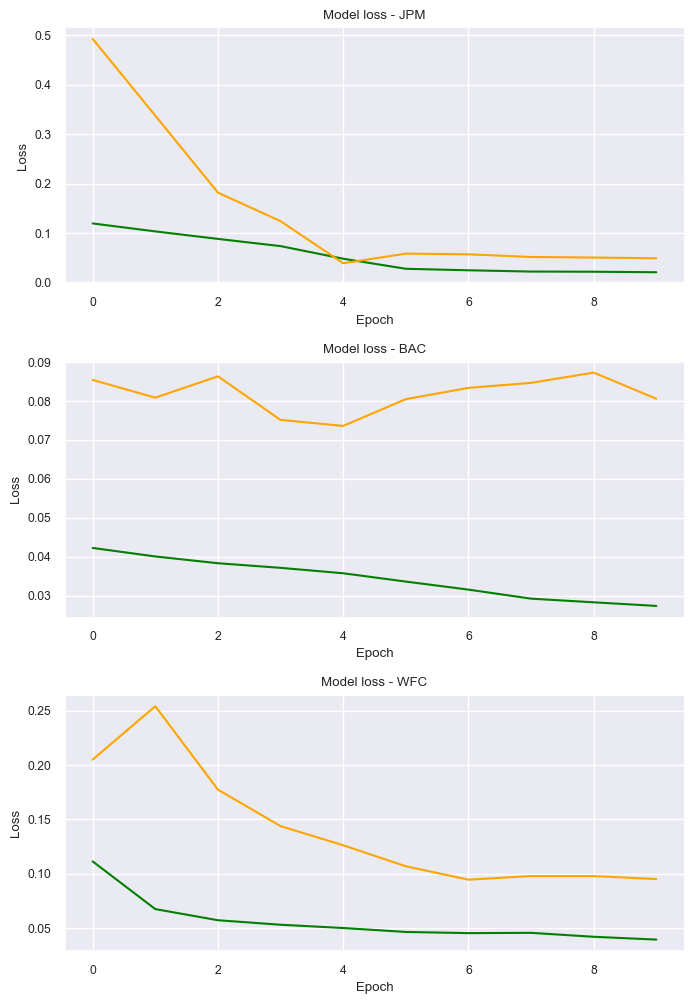

In [58]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name in merged_df_ticker_dict.keys():
    loss_values = history_LSTM_dict[name].history['loss']
    val_loss = history_LSTM_dict[name].history['val_loss']

    axs[ind].plot(loss_values, label= 'Training Loss', color = 'green')
    axs[ind].plot(val_loss, label= 'Validation Loss', color = 'orange')
    axs[ind].set_title(f'Model loss - {name}')
    axs[ind].set_xlabel('Epoch')
    axs[ind].set_ylabel('Loss')
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing

plt.show()

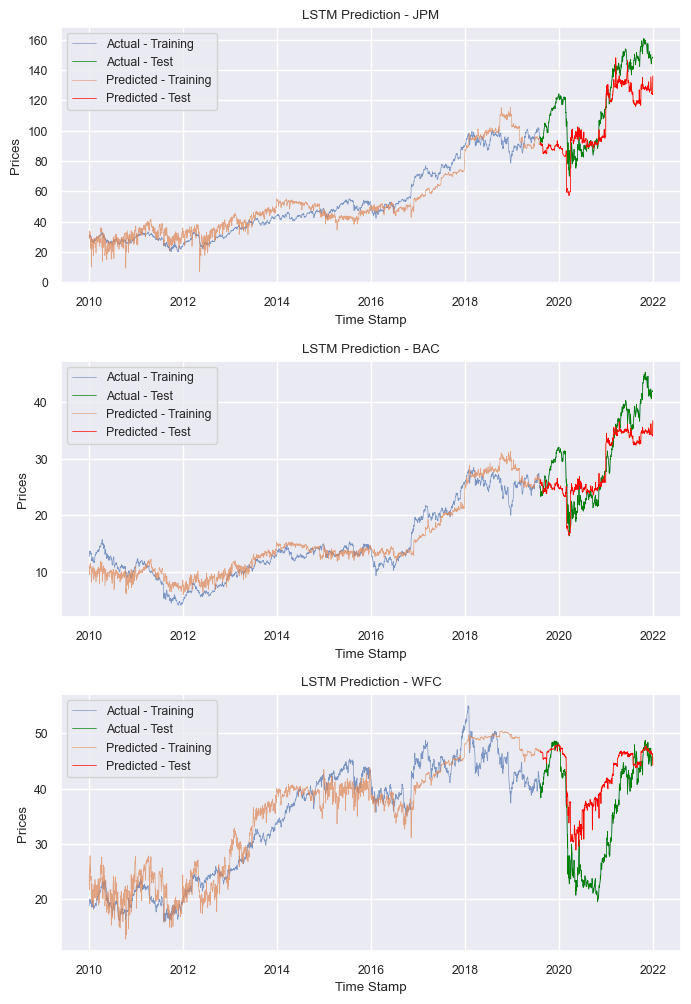

In [59]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():

    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=0.5)

    axs[ind].plot(ticker_df.index, Predict_LSTM_dict[name], label="Predicted - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_LSTM_dict[name][-635:], label="Predicted - Test", color='red', linewidth=0.5)

    
    axs[ind].set_title(f'LSTM Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

    
plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing

plt.show()

### Gated Recurrent Unit (GRU)

In [60]:
from tensorflow.keras.layers import GRU
# Define the GRU model
model_GRU = Sequential([
    GRU(units=50, activation='tanh', input_shape=(X_train_dict['JPM'].shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# Train and ptedict the model
history_GRU_dict = {}
Predict_GRU_dict = {}
print('\n JPM')
history_GRU_dict['JPM'] = model_GRU.fit(X_train_dict['JPM'], Y_train_dict['JPM'], epochs=10, batch_size=32, validation_data=(X_val_dict['JPM'], Y_val_dict['JPM']), verbose=1)
scaled_merged_df_copy = scaled_merged_df_ticker_dict['JPM'].copy()
scaled_merged_df_copy['Close'] = model_GRU.predict(scaled_merged_df_copy)[:, 0]
Predict_GRU = scaler_dict['JPM'].inverse_transform(scaled_merged_df_copy)
Predict_GRU = pd.DataFrame(Predict_GRU, columns=scaled_merged_df_copy.columns)
Predict_GRU = Predict_GRU['Close']
Predict_GRU_dict['JPM'] = Predict_GRU

print('\n BAC')
history_GRU_dict['BAC'] = model_GRU.fit(X_train_dict['BAC'], Y_train_dict['BAC'], epochs=10, batch_size=32, validation_data=(X_val_dict['BAC'], Y_val_dict['BAC']), verbose=1)
scaled_merged_df_copy = scaled_merged_df_ticker_dict['BAC'].copy()
scaled_merged_df_copy['Close'] = model_GRU.predict(scaled_merged_df_copy)[:, 0]
Predict_GRU = scaler_dict['BAC'].inverse_transform(scaled_merged_df_copy)
Predict_GRU = pd.DataFrame(Predict_GRU, columns=scaled_merged_df_copy.columns)
Predict_GRU = Predict_GRU['Close']
Predict_GRU_dict['BAC'] = Predict_GRU

print('\n WFC')
history_GRU_dict['WFC'] = model_GRU.fit(X_train_dict['WFC'], Y_train_dict['WFC'], epochs=10, batch_size=32, validation_data=(X_val_dict['WFC'], Y_val_dict['WFC']), verbose=1)
scaled_merged_df_copy = scaled_merged_df_ticker_dict['WFC'].copy()
scaled_merged_df_copy['Close'] = model_GRU.predict(scaled_merged_df_copy)[:, 0]
Predict_GRU = scaler_dict['WFC'].inverse_transform(scaled_merged_df_copy)
Predict_GRU = pd.DataFrame(Predict_GRU, columns=scaled_merged_df_copy.columns)
Predict_GRU = Predict_GRU['Close']
Predict_GRU_dict['WFC'] = Predict_GRU




 JPM
Epoch 1/10
72/72 [==============================] - 4s 11ms/step - loss: 0.0165 - val_loss: 0.0059
Epoch 2/10
72/72 [==============================] - 1s 7ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 3/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 4/10
72/72 [==============================] - 1s 11ms/step - loss: 9.3635e-04 - val_loss: 0.0032
Epoch 5/10
72/72 [==============================] - 1s 12ms/step - loss: 7.5630e-04 - val_loss: 0.0029
Epoch 6/10
72/72 [==============================] - 1s 12ms/step - loss: 6.5514e-04 - val_loss: 0.0044
Epoch 7/10
72/72 [==============================] - 1s 12ms/step - loss: 5.8243e-04 - val_loss: 0.0059
Epoch 8/10
72/72 [==============================] - 1s 12ms/step - loss: 5.2979e-04 - val_loss: 0.0034
Epoch 9/10
72/72 [==============================] - 1s 11ms/step - loss: 4.9585e-04 - val_loss: 0.0035
Epoch 10/10
100/100 [==============================] - 1s 4ms/step

 BAC
Epoch 

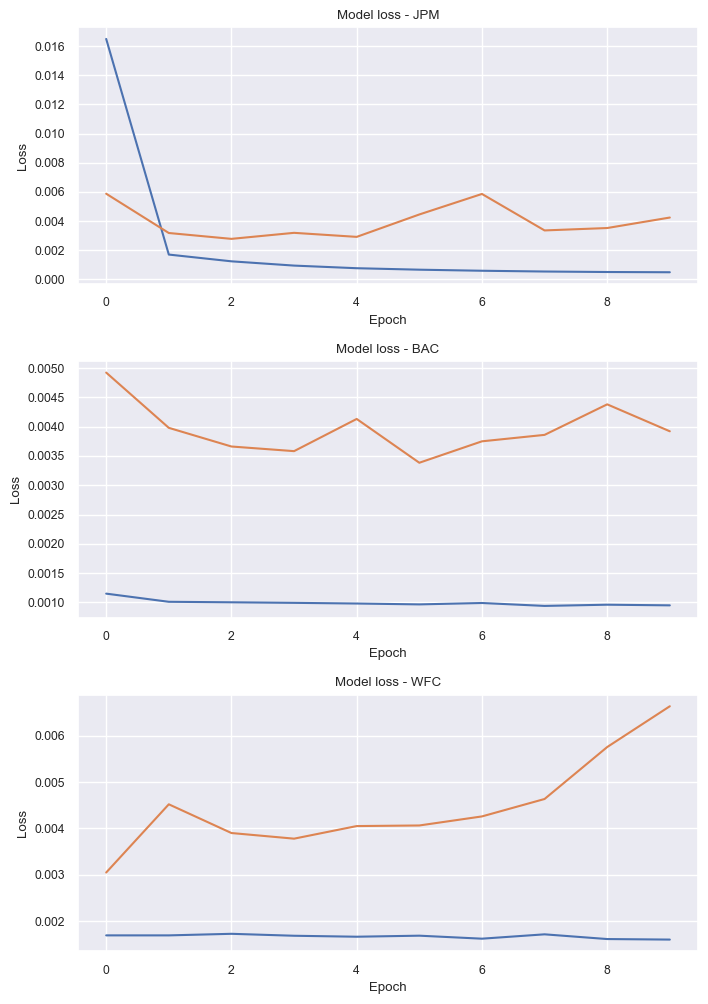

In [61]:
# Plot training history
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name in merged_df_ticker_dict.keys():
    loss_values = history_GRU_dict[name].history['loss']
    val_loss = history_GRU_dict[name].history['val_loss']

    axs[ind].plot(loss_values, label='Training Loss')
    axs[ind].plot(val_loss, label='Validation Loss')
    axs[ind].set_title(f'Model loss - {name}')
    axs[ind].set_xlabel('Epoch')
    axs[ind].set_ylabel('Loss')
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing

plt.show()

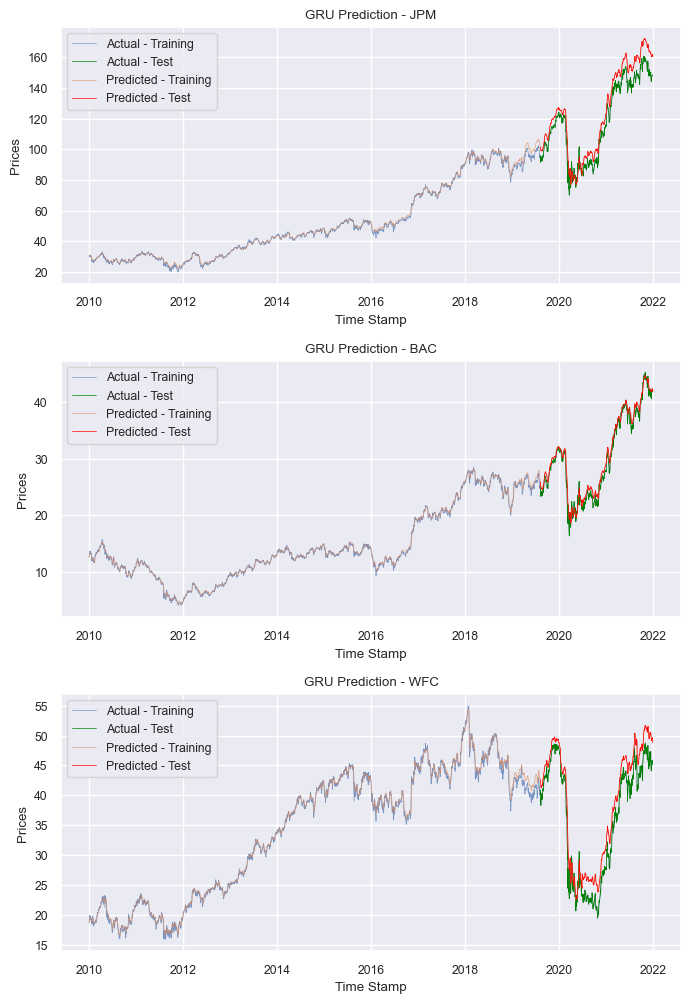

In [62]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():

    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=0.5)

    axs[ind].plot(ticker_df.index, Predict_GRU_dict[name], label="Predicted - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_GRU_dict[name][-635:], label="Predicted - Test", color='red', linewidth=0.5)

    
    axs[ind].set_title(f'GRU Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

    
plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing

plt.show()

### Convolutional Neural Network (CNN)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense

def CNN_model():
    """
    Create and configure a CNN model for stock price prediction.

    :return: The configured CNN model (keras.Sequential)
    """

    model = Sequential()

    model.add(Conv1D(filters=50, kernel_size=3, activation='relu', input_shape=(14, 1)))
    model.add(Dropout(0.4))

    model.add(Conv1D(filters=50, kernel_size=3, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Conv1D(filters=50, kernel_size=3, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(units=1))

    return model

In [64]:
model_CNN = CNN_model()
model_CNN.summary()

optimizer_CNN = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_CNN.compile(
    optimizer=optimizer_CNN, loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 50)            200       
                                                                 
 dropout_4 (Dropout)         (None, 12, 50)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 50)            7550      
                                                                 
 dropout_5 (Dropout)         (None, 10, 50)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 50)             7550      
                                                                 
 dropout_6 (Dropout)         (None, 8, 50)             0         
                                                                 
 flatten (Flatten)           (None, 400)              

### Training CNN Model

In [65]:
# Train the model and ptedict
history_CNN_dict = {}
Predict_CNN_dict = {}
print('\n JPM')
history_CNN_dict['JPM'] = model_CNN.fit(X_train_dict['JPM'], Y_train_dict['JPM'], epochs=10, batch_size=32,
                                        validation_data=(X_val_dict['JPM'], Y_val_dict['JPM']), 
                                        use_multiprocessing=True,
                                        callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['JPM'].copy()
scaled_merged_df_copy['Close'] = model_CNN.predict(scaled_merged_df_copy)[:, 0]
Predict_CNN = scaler_dict['JPM'].inverse_transform(scaled_merged_df_copy)
Predict_CNN = pd.DataFrame(Predict_CNN, columns=scaled_merged_df_copy.columns)
Predict_CNN = Predict_CNN['Close']
Predict_CNN_dict['JPM'] = Predict_CNN

print('\n BAC')
history_CNN_dict['BAC'] = model_CNN.fit(X_train_dict['BAC'], Y_train_dict['BAC'], epochs=10, batch_size=32,
                                        validation_data=(X_val_dict['BAC'], Y_val_dict['BAC']), 
                                        use_multiprocessing=True,
                                        callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['BAC'].copy()
scaled_merged_df_copy['Close'] = model_CNN.predict(scaled_merged_df_copy)[:, 0]
Predict_CNN = scaler_dict['BAC'].inverse_transform(scaled_merged_df_copy)
Predict_CNN = pd.DataFrame(Predict_CNN, columns=scaled_merged_df_copy.columns)
Predict_CNN = Predict_CNN['Close']
Predict_CNN_dict['BAC'] = Predict_CNN

print('\n WFC')
history_CNN_dict['WFC'] = model_CNN.fit(X_train_dict['WFC'], Y_train_dict['WFC'], epochs=10, batch_size=32,
                                        validation_data=(X_val_dict['WFC'], Y_val_dict['WFC']), 
                                        use_multiprocessing=True,
                                        callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['WFC'].copy()
scaled_merged_df_copy['Close'] = model_CNN.predict(scaled_merged_df_copy)[:, 0]
Predict_CNN = scaler_dict['WFC'].inverse_transform(scaled_merged_df_copy)
Predict_CNN = pd.DataFrame(Predict_CNN, columns=scaled_merged_df_copy.columns)
Predict_CNN = Predict_CNN['Close']
Predict_CNN_dict['WFC'] = Predict_CNN



 JPM
Epoch 1/10
72/72 [==============================] - 2s 12ms/step - loss: 0.1262 - val_loss: 0.3964
Epoch 2/10
72/72 [==============================] - 1s 9ms/step - loss: 0.0626 - val_loss: 0.1069
Epoch 3/10
72/72 [==============================] - 1s 9ms/step - loss: 0.0321 - val_loss: 0.0172
Epoch 4/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0245 - val_loss: 0.0179
Epoch 5/10
72/72 [==============================] - 1s 9ms/step - loss: 0.0232 - val_loss: 0.0242
Epoch 6/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0219
Epoch 7/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0219
Epoch 8/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.0199
Epoch 9/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.0227
Epoch 10/10
100/100 [==============================] - 0s 2ms/step

 BAC
Epoch 1/10
72/72 [====================

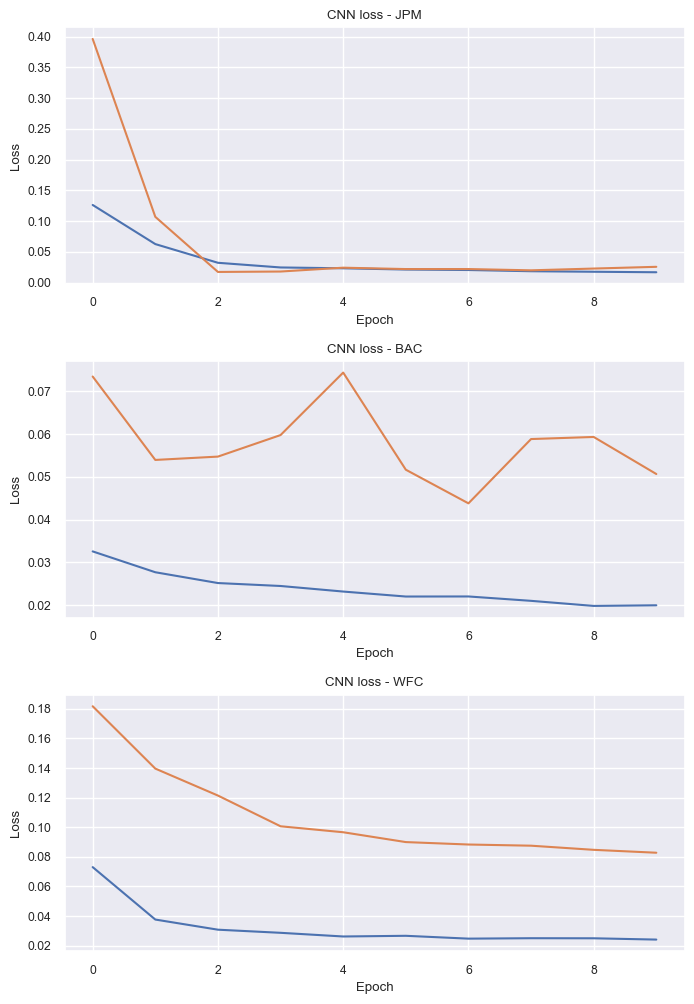

In [66]:
# Plot training history
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name in merged_df_ticker_dict.keys():
    loss_values = history_CNN_dict[name].history['loss']
    val_loss = history_CNN_dict[name].history['val_loss']

    axs[ind].plot(loss_values, label='Training Loss')
    axs[ind].plot(val_loss, label='Validation Loss')
    axs[ind].set_title(f'CNN loss - {name}')
    axs[ind].set_xlabel('Epoch')
    axs[ind].set_ylabel('Loss')
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing

plt.show(block=True)

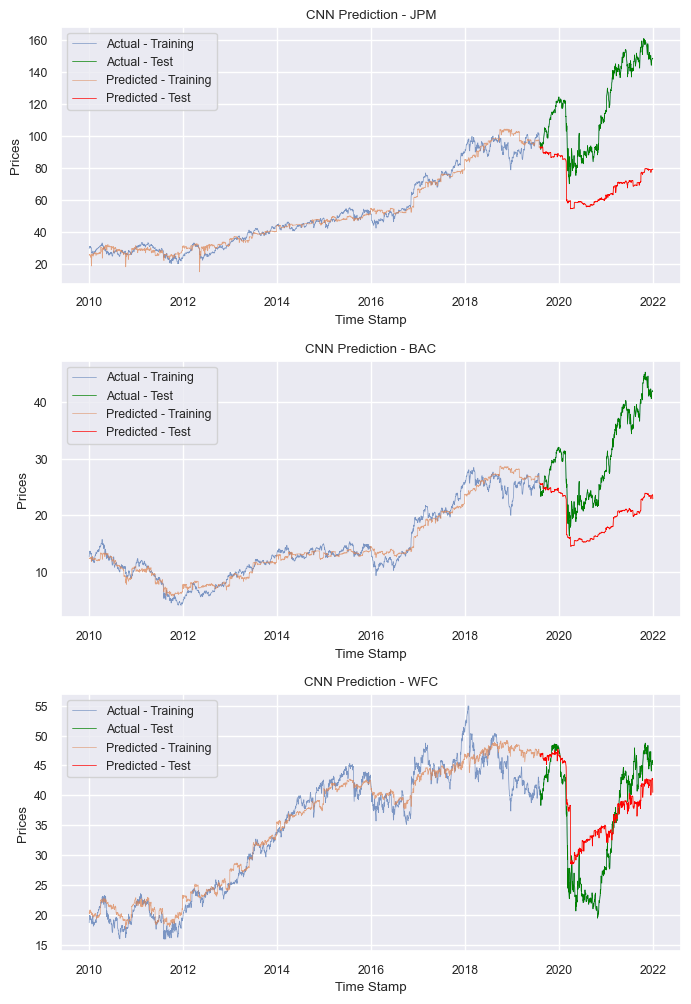

In [67]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():

    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=0.5)

    axs[ind].plot(ticker_df.index, Predict_CNN_dict[name], label="Predicted - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_CNN_dict[name][-635:], label="Predicted - Test", color='red', linewidth=0.5)

    
    axs[ind].set_title(f'CNN Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

    
plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing

plt.show()

### Sequence-to-Sequence (seq2seq) model

In [68]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

def seq2seq_model(input_shape=(14, 1), lstm_units=25):
    # Encoder
    encoder_inputs = Input(shape=input_shape, name='encoder_input')
    encoder = LSTM(lstm_units, return_state=True, name='encoder_lstm')
    _, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    decoder_inputs = Input(shape=input_shape, name='decoder_input')
    decoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True, name='decoder_lstm')
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(1, name='decoder_dense')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Seq2Seq Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return model

In [69]:
model_seq2seq = seq2seq_model()
model_seq2seq.summary()

optimizer_seq2seq = tf.keras.optimizers.Adam(learning_rate=0.0002)

model_seq2seq.compile(
    optimizer=optimizer_seq2seq,
    loss='mean_squared_error'
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 14, 1)]              0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, 14, 1)]              0         []                            
                                                                                                  
 encoder_lstm (LSTM)         [(None, 25),                 2700      ['encoder_input[0][0]']       
                              (None, 25),                                                         
                              (None, 25)]                                                         
                                                                                              

In [70]:
# Train the model and ptedict
history_seq2seq_dict = {}
Predict_seq2seq_dict = {}
print('\n JPM')
decoder_input_train = np.zeros_like(Y_train_dict['JPM'])
decoder_input_train[:, 1:] = Y_train_dict['JPM'][:, :-1]
decoder_input_val = np.zeros_like(Y_val_dict['JPM'])
decoder_input_val[:, 1:] = Y_val_dict['JPM'][:, :-1]
history_seq2seq_dict['JPM'] = model_seq2seq.fit([X_train_dict['JPM'], decoder_input_train], Y_train_dict['JPM'], epochs=10, batch_size=60,
                                        validation_data=([X_val_dict['JPM'],decoder_input_val], Y_val_dict['JPM']), 
                                        use_multiprocessing=True,
                                        callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['JPM'].copy()
scaled_merged_df_seq2seq_expanded = np.expand_dims(scaled_merged_df_copy, axis=-1)
decoder_input_pred = np.zeros((scaled_merged_df_seq2seq_expanded.shape[0], scaled_merged_df_seq2seq_expanded.shape[1], 1))
predicted_seq2seq = model_seq2seq.predict([scaled_merged_df_seq2seq_expanded, decoder_input_pred])
scaled_merged_df_seq2seq = scaled_merged_df_copy.copy()
scaled_merged_df_seq2seq['Close'] = predicted_seq2seq[:, 0, 0]
Predict_seq2seq = scaler_dict['JPM'].inverse_transform(scaled_merged_df_seq2seq)
Predict_seq2seq = pd.DataFrame(Predict_seq2seq, columns=scaled_merged_df_copy.columns)
Predict_seq2seq = Predict_seq2seq['Close']
Predict_seq2seq_dict['JPM'] = Predict_seq2seq

print('\n BAC')
decoder_input_train = np.zeros_like(Y_train_dict['BAC'])
decoder_input_train[:, 1:] = Y_train_dict['BAC'][:, :-1]
decoder_input_val = np.zeros_like(Y_val_dict['BAC'])
decoder_input_val[:, 1:] = Y_val_dict['BAC'][:, :-1]
history_seq2seq_dict['BAC'] = model_seq2seq.fit([X_train_dict['BAC'], decoder_input_train], Y_train_dict['BAC'], epochs=10, batch_size=60,
                                        validation_data=([X_val_dict['BAC'],decoder_input_val], Y_val_dict['BAC']), 
                                        use_multiprocessing=True,
                                        callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['BAC'].copy()
scaled_merged_df_seq2seq_expanded = np.expand_dims(scaled_merged_df_copy, axis=-1)
decoder_input_pred = np.zeros((scaled_merged_df_seq2seq_expanded.shape[0], scaled_merged_df_seq2seq_expanded.shape[1], 1))
predicted_seq2seq = model_seq2seq.predict([scaled_merged_df_seq2seq_expanded, decoder_input_pred])
scaled_merged_df_seq2seq = scaled_merged_df_copy.copy()
scaled_merged_df_seq2seq['Close'] = predicted_seq2seq[:, 0, 0]
Predict_seq2seq = scaler_dict['BAC'].inverse_transform(scaled_merged_df_seq2seq)
Predict_seq2seq = pd.DataFrame(Predict_seq2seq, columns=scaled_merged_df_copy.columns)
Predict_seq2seq = Predict_seq2seq['Close']
Predict_seq2seq_dict['BAC'] = Predict_seq2seq

print('\n WFC')
decoder_input_train = np.zeros_like(Y_train_dict['WFC'])
decoder_input_train[:, 1:] = Y_train_dict['WFC'][:, :-1]
decoder_input_val = np.zeros_like(Y_val_dict['WFC'])
decoder_input_val[:, 1:] = Y_val_dict['WFC'][:, :-1]
history_seq2seq_dict['WFC'] = model_seq2seq.fit([X_train_dict['WFC'], decoder_input_train], Y_train_dict['WFC'], epochs=10, batch_size=60,
                                        validation_data=([X_val_dict['WFC'],decoder_input_val], Y_val_dict['WFC']), 
                                        use_multiprocessing=True,
                                        callbacks=[early_stopping])
scaled_merged_df_copy = scaled_merged_df_ticker_dict['WFC'].copy()
scaled_merged_df_seq2seq_expanded = np.expand_dims(scaled_merged_df_copy, axis=-1)
decoder_input_pred = np.zeros((scaled_merged_df_seq2seq_expanded.shape[0], scaled_merged_df_seq2seq_expanded.shape[1], 1))
predicted_seq2seq = model_seq2seq.predict([scaled_merged_df_seq2seq_expanded, decoder_input_pred])
scaled_merged_df_seq2seq = scaled_merged_df_copy.copy()
scaled_merged_df_seq2seq['Close'] = predicted_seq2seq[:, 0, 0]
Predict_seq2seq = scaler_dict['WFC'].inverse_transform(scaled_merged_df_seq2seq)
Predict_seq2seq = pd.DataFrame(Predict_seq2seq, columns=scaled_merged_df_copy.columns)
Predict_seq2seq = Predict_seq2seq['Close']
Predict_seq2seq_dict['WFC'] = Predict_seq2seq


 JPM
Epoch 1/10
39/39 [==============================] - 6s 37ms/step - loss: 0.0865 - val_loss: 0.2975
Epoch 2/10
39/39 [==============================] - 1s 13ms/step - loss: 0.0579 - val_loss: 0.1775
Epoch 3/10
39/39 [==============================] - 1s 13ms/step - loss: 0.0353 - val_loss: 0.0706
Epoch 4/10
39/39 [==============================] - 0s 13ms/step - loss: 0.0188 - val_loss: 0.0176
Epoch 5/10
39/39 [==============================] - 1s 15ms/step - loss: 0.0109 - val_loss: 0.0182
Epoch 6/10
39/39 [==============================] - 0s 12ms/step - loss: 0.0080 - val_loss: 0.0191
Epoch 7/10
39/39 [==============================] - 0s 12ms/step - loss: 0.0063 - val_loss: 0.0178
Epoch 8/10
39/39 [==============================] - 0s 12ms/step - loss: 0.0052 - val_loss: 0.0178
Epoch 9/10
39/39 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0176
Epoch 10/10
100/100 [==============================] - 1s 3ms/step

 BAC
Epoch 1/10
39/39 [============

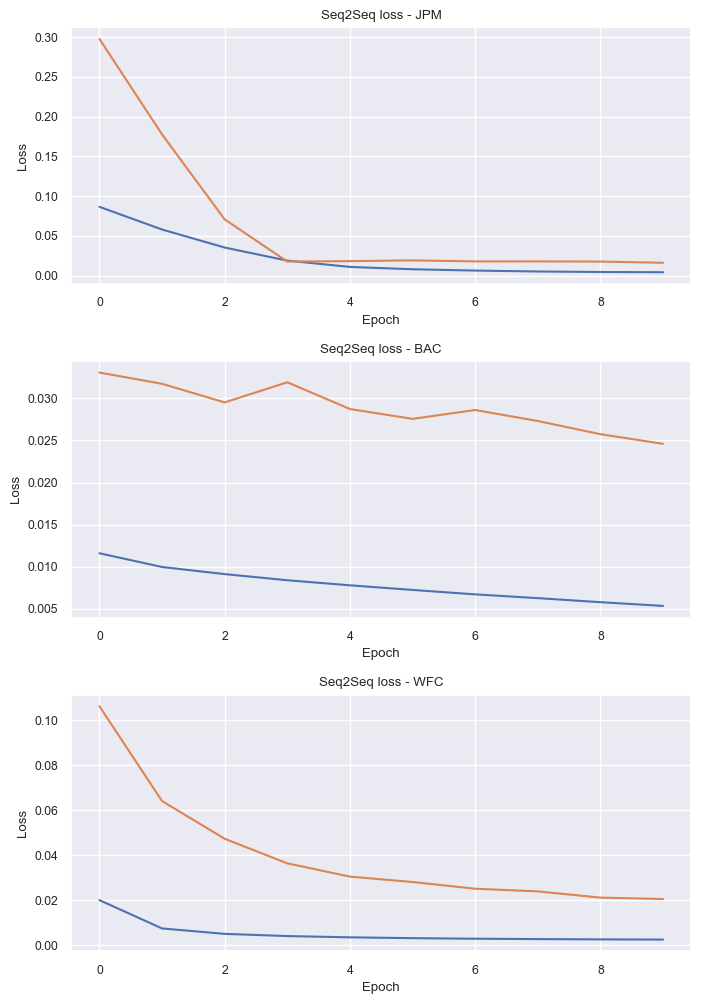

In [71]:
# Plot training history
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name in merged_df_ticker_dict.keys():
    loss_values = history_seq2seq_dict[name].history['loss']
    val_loss = history_seq2seq_dict[name].history['val_loss']

    axs[ind].plot(loss_values, label='Training Loss')
    axs[ind].plot(val_loss, label='Validation Loss')
    axs[ind].set_title(f'Seq2Seq loss - {name}')
    axs[ind].set_xlabel('Epoch')
    axs[ind].set_ylabel('Loss')
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing

plt.show(block=True)

### Predicting using seq2seq

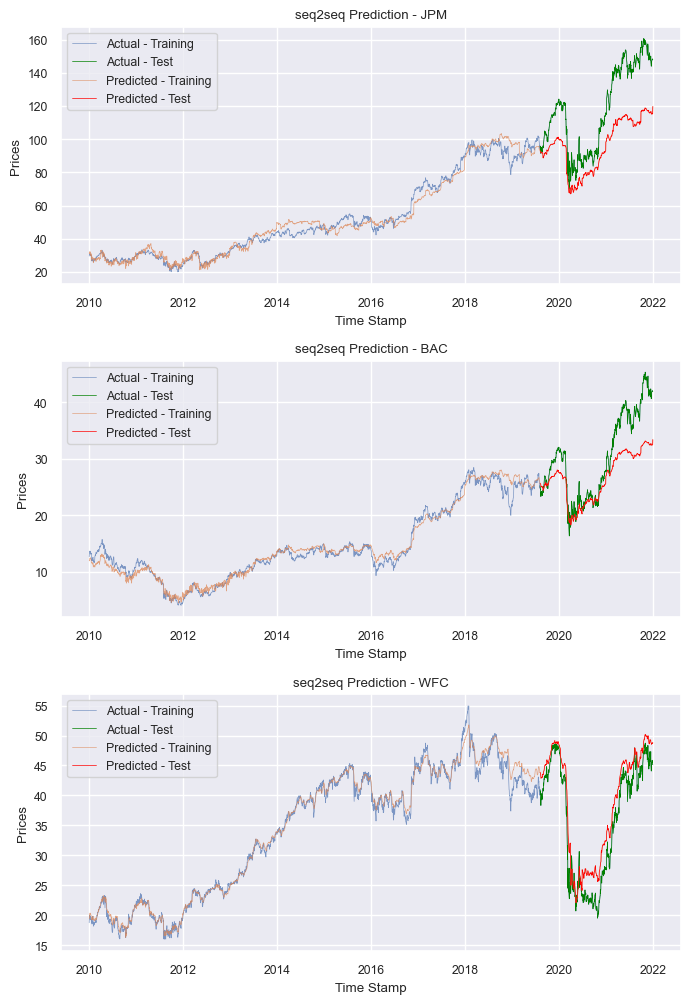

In [72]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():

    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], ticker_df['Close'][-635:], label="Actual - Test", color='green', linewidth=0.5)

    axs[ind].plot(ticker_df.index, Predict_seq2seq_dict[name], label="Predicted - Training", linewidth=0.5, alpha=0.7)
    axs[ind].plot(ticker_df.index[-635:], Predict_seq2seq_dict[name][-635:], label="Predicted - Test", color='red', linewidth=0.5)

    
    axs[ind].set_title(f'seq2seq Prediction - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

    
plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=False)
plt.show()

### Comparing the Deep Learning models

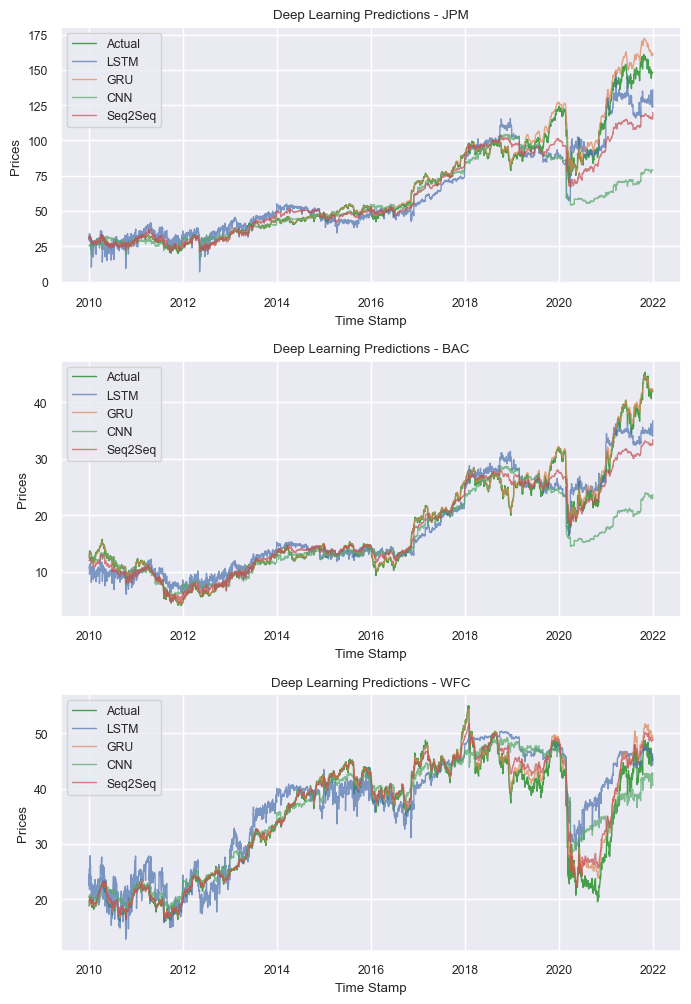

In [73]:
fig, axs = plt.subplots(3, 1,  figsize=(8, 12))

ind = 0
for name,ticker_df in merged_df_ticker_dict.items():
    axs[ind].plot(ticker_df.index, ticker_df['Close'], label="Actual", color='green', linewidth=1, alpha=0.7)

    axs[ind].plot(ticker_df.index, Predict_LSTM_dict[name], label="LSTM", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index, Predict_GRU_dict[name], label="GRU", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index, Predict_CNN_dict[name], label="CNN", linewidth=1, alpha=0.7)
    axs[ind].plot(ticker_df.index, Predict_seq2seq_dict[name], label="Seq2Seq", linewidth=1, alpha=0.7)

    axs[ind].set_title(f'Deep Learning Predictions - {name}')
    axs[ind].set_xlabel('Time Stamp')
    axs[ind].set_ylabel('Prices')
    axs[ind].legend()
    axs[ind].grid(True)
    ind += 1

plt.subplots_adjust(hspace=0.3) # Adjust this value to increase/decrease spacing
mplcursors.cursor(hover=True)
plt.savefig('DL prediction_high_quality.png', dpi=300, bbox_inches='tight')

plt.show()

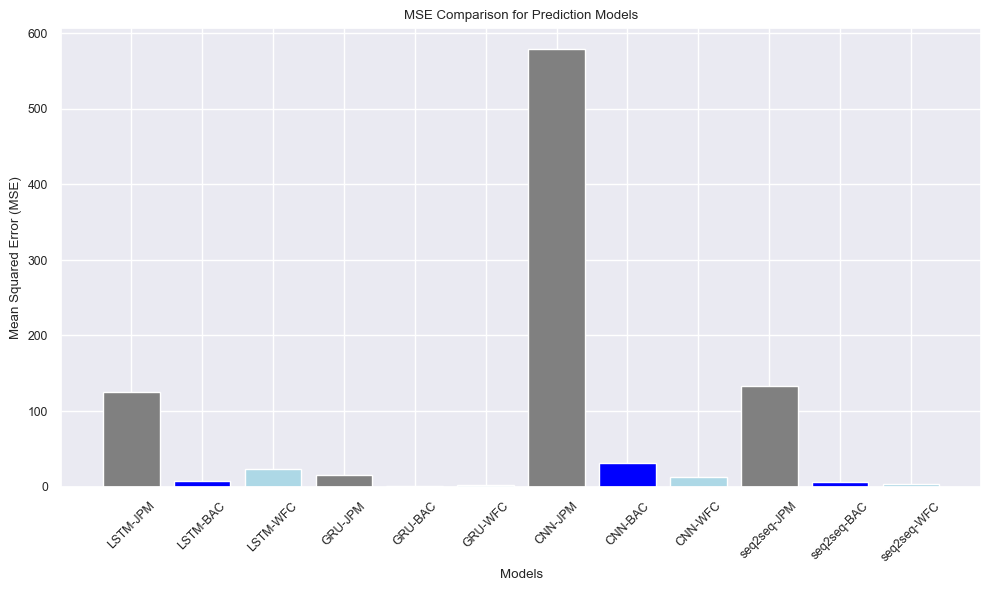

In [74]:
mse_LSTM_dict = {}
mse_GRU_dict = {}
mse_CNN_dict = {}
mse_seq2seq_dict = {}
for name, df in merged_df_ticker_dict.items():
    actual = df['Close']
    mse_LSTM_dict[name] = mean_squared_error(actual, Predict_LSTM_dict[name])
    mse_GRU_dict[name] = mean_squared_error(actual, Predict_GRU_dict[name])
    mse_CNN_dict[name] = mean_squared_error(actual, Predict_CNN_dict[name])
    mse_seq2seq_dict[name] = mean_squared_error(actual, Predict_seq2seq_dict[name])


models_name = ['LSTM-JPM', 'LSTM-BAC', 'LSTM-WFC',
               'GRU-JPM', 'GRU-BAC', 'GRU-WFC',
               'CNN-JPM', 'CNN-BAC', 'CNN-WFC',
               'seq2seq-JPM', 'seq2seq-BAC', 'seq2seq-WFC']

mse_values = [mse_LSTM_dict['JPM'], mse_LSTM_dict['BAC'], mse_LSTM_dict['WFC'],
              mse_GRU_dict['JPM'], mse_GRU_dict['BAC'], mse_GRU_dict['WFC'],
              mse_CNN_dict['JPM'], mse_CNN_dict['BAC'], mse_CNN_dict['WFC'],   
              mse_seq2seq_dict['JPM'], mse_seq2seq_dict['BAC'], mse_seq2seq_dict['WFC']]

color = ['grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue']


plt.figure(figsize=(10, 6))
plt.bar(models_name, mse_values, color=color)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Prediction Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
list_of_dicts = [mse_LSTM_dict, mse_GRU_dict, mse_CNN_dict, mse_seq2seq_dict]
mse_depp_learning_df = pd.DataFrame(list_of_dicts)
mse_depp_learning_df.index =['LSTM', 'GRU', 'CNN', 'seq2seq']
mse_depp_learning_df

,JPM,BAC,WFC
LSTM,124.663572,7.659302,23.683168
GRU,14.964725,0.275004,2.038607
CNN,578.359723,30.677268,12.439216
seq2seq,133.395458,5.917425,3.169911


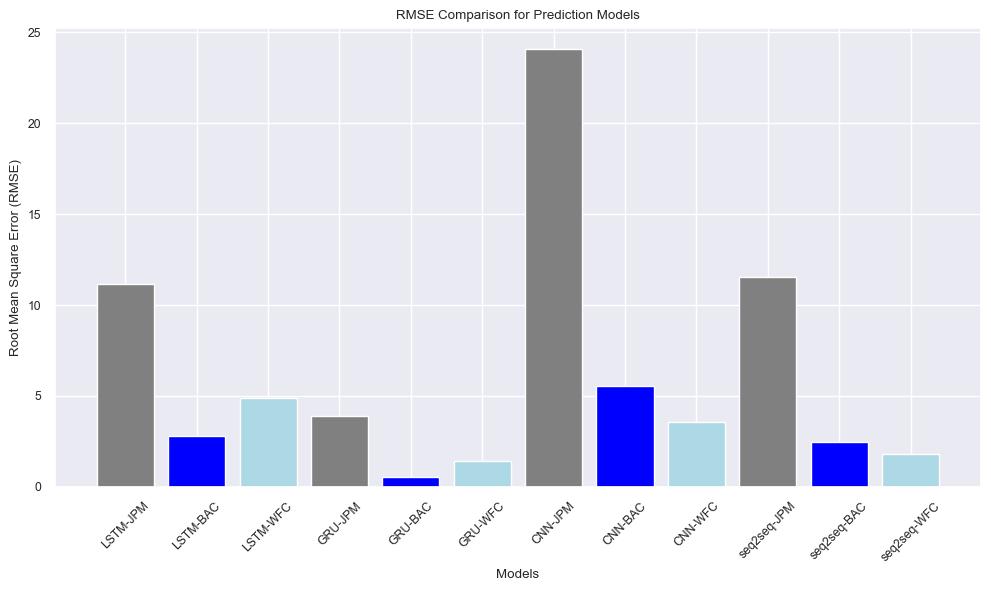

In [76]:
rmse_LSTM_dict = {}
rmse_GRU_dict = {}
rmse_CNN_dict = {}
rmse_seq2seq_dict = {}
for name, df in merged_df_ticker_dict.items():
    actual = df['Close']
    rmse_LSTM_dict[name] = mean_squared_error(actual, Predict_LSTM_dict[name], squared=False)
    rmse_GRU_dict[name] = mean_squared_error(actual, Predict_GRU_dict[name], squared=False)
    rmse_CNN_dict[name] = mean_squared_error(actual, Predict_CNN_dict[name], squared=False)
    rmse_seq2seq_dict[name] = mean_squared_error(actual, Predict_seq2seq_dict[name], squared=False)


rmse_values = [rmse_LSTM_dict['JPM'], rmse_LSTM_dict['BAC'], rmse_LSTM_dict['WFC'],
              rmse_GRU_dict['JPM'], rmse_GRU_dict['BAC'], rmse_GRU_dict['WFC'],
              rmse_CNN_dict['JPM'], rmse_CNN_dict['BAC'], rmse_CNN_dict['WFC'],   
              rmse_seq2seq_dict['JPM'], rmse_seq2seq_dict['BAC'], rmse_seq2seq_dict['WFC']]

color = ['grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue']


plt.figure(figsize=(10, 6))
plt.bar(models_name, rmse_values, color=color)
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE Comparison for Prediction Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
#list_of_dicts = [mse_Ridge_dict, mse_Lasso_dict, mse_RF_dict, mse_DTR_dict, mse_XGB_dict, mse_LSTM_dict, mse_GRU_dict, mse_CNN_dict, mse_seq2seq_dict]
#mse_depp_learning_df = pd.DataFrame(list_of_dicts)
#mse_depp_learning_df.index =['Ridge', 'Lasso', 'RF', 'DTR', 'XGB', 'LSTM', 'GRU', 'CNN', 'seq2seq']
#mse_depp_learning_df

In [78]:
list_of_dicts = [rmse_Ridge_JPM, rmse_Ridge_BAC, rmse_Ridge_WFC,
              rmse_Lasso_JPM, rmse_Lasso_BAC, rmse_Lasso_WFC,
              rmse_rf_JPM, rmse_rf_BAC, rmse_rf_WFC,
              rmse_DTR_JPM, rmse_DTR_BAC, rmse_DTR_WFC,
              rmse_XGB_JPM, rmse_XGB_BAC, rmse_XGB_WFC,
              rmse_LSTM_dict['JPM'], rmse_LSTM_dict['BAC'], rmse_LSTM_dict['WFC'],
              rmse_GRU_dict['JPM'], rmse_GRU_dict['BAC'], rmse_GRU_dict['WFC'],
              rmse_CNN_dict['JPM'], rmse_CNN_dict['BAC'], rmse_CNN_dict['WFC'],   
              rmse_seq2seq_dict['JPM'], rmse_seq2seq_dict['BAC'], rmse_seq2seq_dict['WFC']]

rmse_depp_learning_df = pd.DataFrame(list_of_dicts)
rmse_depp_learning_df.index =[
               'Ridge-JPM', 'Ridge-BAC', 'Ridge-WFC',
               'Lasso-JPM', 'Lasso-BAC', 'Lasso-WFC',
               'RF-JPM', 'RF-BAC', 'RF-WFC',
               'DTR-JPM', 'DTR-BAC', 'DTR-WFC',
               'XGB-JPM', 'XGB-BAC', 'XGB-WFC', 
               'LSTM-JPM', 'LSTM-BAC', 'LSTM-WFC',
               'GRU-JPM', 'GRU-BAC', 'GRU-WFC',
               'CNN-JPM', 'CNN-BAC', 'CNN-WFC',
               'seq2seq-JPM', 'seq2seq-BAC', 'seq2seq-WFC']
rmse_depp_learning_df

,0
Ridge-JPM,0.388620
Ridge-BAC,0.101589
Ridge-WFC,0.316192
Lasso-JPM,2.984713
Lasso-BAC,0.166776
Lasso-WFC,0.126551
RF-JPM,14.290487
RF-BAC,3.328714
RF-WFC,0.508233
DTR-JPM,32.054179


In [79]:
mean_squared_error(actual, Predict_Ridge_dict['JPM'], squared=False)

43.41861262462645

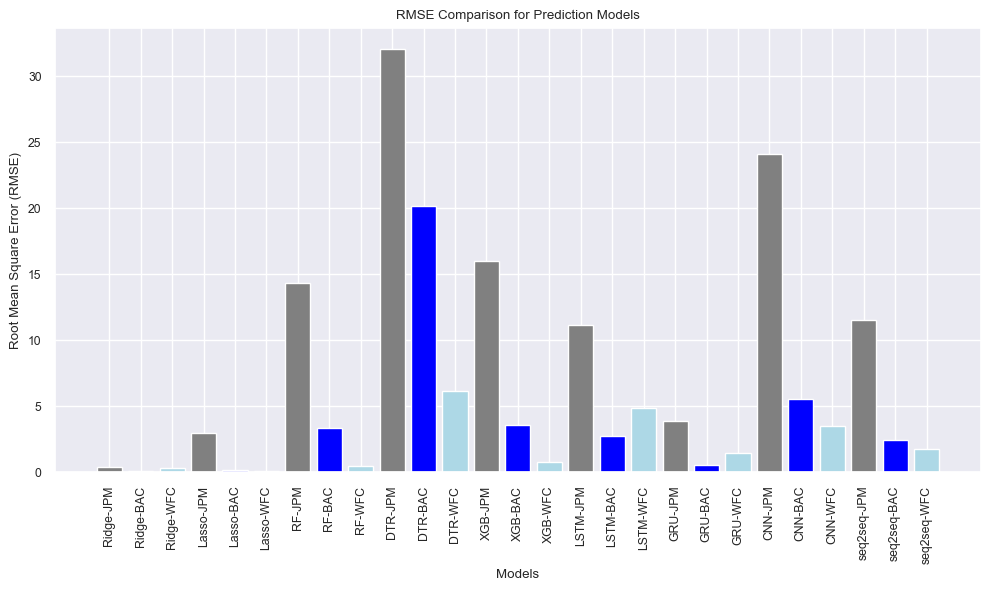

In [80]:
models_name = ['Ridge-JPM', 'Ridge-BAC', 'Ridge-WFC',
               'Lasso-JPM', 'Lasso-BAC', 'Lasso-WFC',
               'RF-JPM', 'RF-BAC', 'RF-WFC',
               'DTR-JPM', 'DTR-BAC', 'DTR-WFC',
               'XGB-JPM', 'XGB-BAC', 'XGB-WFC',
               'LSTM-JPM', 'LSTM-BAC', 'LSTM-WFC',
               'GRU-JPM', 'GRU-BAC', 'GRU-WFC',
               'CNN-JPM', 'CNN-BAC', 'CNN-WFC',
               'seq2seq-JPM', 'seq2seq-BAC', 'seq2seq-WFC']

rmse_values = [rmse_Ridge_JPM, rmse_Ridge_BAC, rmse_Ridge_WFC,
              rmse_Lasso_JPM, rmse_Lasso_BAC, rmse_Lasso_WFC,
              rmse_rf_JPM, rmse_rf_BAC, rmse_rf_WFC,
              rmse_DTR_JPM, rmse_DTR_BAC, rmse_DTR_WFC,
              rmse_XGB_JPM, rmse_XGB_BAC, rmse_XGB_WFC,
              rmse_LSTM_dict['JPM'], rmse_LSTM_dict['BAC'], rmse_LSTM_dict['WFC'],
              rmse_GRU_dict['JPM'], rmse_GRU_dict['BAC'], rmse_GRU_dict['WFC'],
              rmse_CNN_dict['JPM'], rmse_CNN_dict['BAC'], rmse_CNN_dict['WFC'],   
              rmse_seq2seq_dict['JPM'], rmse_seq2seq_dict['BAC'], rmse_seq2seq_dict['WFC']]

color = ['grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue',
         'grey', 'blue', 'lightblue']

plt.figure(figsize=(10, 6))
plt.bar(models_name, rmse_values, color=color)
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE Comparison for Prediction Models')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Selected Models:
Choose the best models with lower RMSE

#### Machine Learning Models:
1. Ridge : Ridge Regression
2. Lasso : Lasso Regression
#### Deep Learning Models:
1. GRU : Gated Recurrent Unit
2. LSTM : Long Short-Term Memory 
3. seq2seq : Sequence-to-Sequence


In [81]:
# bank selection: The bank dataset currently used for the analysis below. Please change as needed. 
name = 'JPM'

### MA3 & MA7 for Predictions

In [82]:
def process_data_and_calculate_metrics(predictions_values, column_names, num_elements=635):
    
    new_df = pd.DataFrame()
    for i, column_name in enumerate(column_names):
        new_df[column_name] = predictions_values[i]
    
    new_df = new_df.tail(num_elements)


    for col_name in column_names:
        new_df[f'MA3 {col_name}'] = new_df[col_name].rolling(window=3, min_periods=1).mean()
        new_df[f'MA7 {col_name}'] = new_df[col_name].rolling(window=7, min_periods=1).mean()

    return new_df
column_names = ["Predict_Ridge", "Predict_Lasso", "Predict_GRU", "Predict_LSTM", "Predict_seq2seq"]
predictions_values = [Predict_Ridge_dict[name], Predict_Lasso_dict[name], Predict_GRU_dict[name], Predict_LSTM_dict[name],  Predict_seq2seq_dict[name]]
df_predictions = process_data_and_calculate_metrics(predictions_values, column_names, num_elements=635)

### Generating Buy & Sell Signal

In [83]:
df_predictions

,Predict_Ridge,Predict_Lasso,Predict_GRU,Predict_LSTM,Predict_seq2seq,MA3 Predict_Ridge,MA7 Predict_Ridge,MA3 Predict_Lasso,MA7 Predict_Lasso,MA3 Predict_GRU,MA7 Predict_GRU,MA3 Predict_LSTM,MA7 Predict_LSTM,MA3 Predict_seq2seq,MA7 Predict_seq2seq
2536,96.510005,96.577661,101.507919,91.192214,92.996893,96.510005,96.510005,96.577661,96.577661,101.507919,101.507919,91.192214,91.192214,92.996893,92.996893
2537,94.870775,94.940046,101.121582,91.058868,92.824348,95.690390,95.690390,95.758853,95.758853,101.314751,101.314751,91.125541,91.125541,92.910621,92.910621
2538,96.179041,96.244962,100.829575,91.216039,92.707203,95.853274,95.853274,95.920890,95.920890,101.153026,101.153026,91.155707,91.155707,92.842815,92.842815
2539,92.478188,92.579356,99.896931,92.101024,92.469001,94.509335,95.009502,94.588121,95.085506,100.616030,100.839002,91.458644,91.392036,92.666851,92.749361
2540,92.746832,92.938006,99.254556,90.857675,91.922384,93.801353,94.556968,93.920775,94.656006,99.993687,100.522113,91.391579,91.285164,92.366196,92.583966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,148.190413,140.085039,161.081878,123.886019,115.256790,147.633417,146.600204,139.552617,138.553134,160.841780,160.699069,124.205961,125.239852,115.261882,115.327992
3167,148.148491,140.016395,161.576890,124.106082,115.433515,148.030932,147.174577,139.925966,139.124444,161.134949,160.751757,123.961866,124.597339,115.305130,115.274963
3168,148.085706,139.944554,161.798454,124.274887,115.451641,148.141537,147.492205,140.015329,139.419820,161.485741,160.958734,124.088996,124.316788,115.380649,115.299802
3169,147.967902,139.841098,161.873326,123.648939,115.387533,148.067366,147.718920,139.934016,139.622321,161.749557,161.193115,124.009969,124.210600,115.424230,115.333341


In [84]:
def generate_df_and_signals(df_predictions, JPM_merged_df, search_term):
    df_predictions_cols = [col for col in df_predictions.columns if search_term in col]
    df_predictions_subset = df_predictions[df_predictions_cols].tail(635).reset_index(drop=True)
    
    JPM_merged_df_subset = JPM_merged_df[['MA3', 'MA7', 'Close']].tail(635).reset_index(drop=True)

    new_df = pd.concat([JPM_merged_df_subset, df_predictions_subset], axis=1)
    new_df.index = JPM_merged_df.tail(635).index

    #new_df['temp_diff_MA7'] = new_df[f'MA7 {search_term}'] - new_df['MA7']
    #new_df['temp_diff_MA3'] = new_df[f'MA3 {search_term}'] - new_df['MA3']
    
    new_df['temp_diff_MA7'] = new_df[f'MA7 {search_term}'].pct_change() * 100
    new_df['temp_diff_MA3'] = new_df[f'MA3 {search_term}'].pct_change() * 100
    
    #new_df['MA7 Signal'] = np.where((new_df['temp_diff_MA7']  0) & (new_df['temp_diff_MA7'].shift() > 0), +1, 0)
    #new_df['MA7 Signal'] = np.where((new_df['temp_diff_MA7'] > 0) & (new_df['temp_diff_MA7'].shift() < 0), -1, new_df['MA7 Signal'])


    new_df['MA7 Signal'] = np.where((new_df['temp_diff_MA7'] < 0) & (new_df['temp_diff_MA7'].shift() > 0), +1, 0)
    new_df['MA3 Signal'] = np.where((new_df['temp_diff_MA3'] < 0) & (new_df['temp_diff_MA3'].shift() > 0), +1, 0)

    new_df['MA7 Signal'] = np.where((new_df['temp_diff_MA7'] > 0) & (new_df['temp_diff_MA7'].shift() < 0), -1, new_df['MA7 Signal'])
    new_df['MA3 Signal'] = np.where((new_df['temp_diff_MA3'] > 0) & (new_df['temp_diff_MA3'].shift() < 0), -1, new_df['MA3 Signal'])

    
    new_df = new_df.drop(columns=['temp_diff_MA7', 'temp_diff_MA3'])

    return new_df

Ridge_Signals = generate_df_and_signals(df_predictions, merged_df_ticker_dict[name], 'Predict_Ridge')
Lasso_Signals = generate_df_and_signals(df_predictions, merged_df_ticker_dict[name], 'Predict_Lasso')
GRU_Signals = generate_df_and_signals(df_predictions, merged_df_ticker_dict[name], 'Predict_GRU')
LSTM_Signals = generate_df_and_signals(df_predictions, merged_df_ticker_dict[name], 'Predict_LSTM')
seq2seq_Signals = generate_df_and_signals(df_predictions, merged_df_ticker_dict[name], 'Predict_seq2seq')


In [85]:
Ridge_Signals

,MA3,MA7,Close,Predict_Ridge,MA3 Predict_Ridge,MA7 Predict_Ridge,MA7 Signal,MA3 Signal
Date,,,,,,,,
2019-08-09,95.414001,96.541043,95.877045,96.510005,96.510005,96.510005,0,0
2019-08-12,95.312078,95.884541,94.077293,94.870775,95.690390,95.690390,0,0
2019-08-13,95.160639,95.436470,95.527580,96.179041,95.853274,95.853274,-1,-1
2019-08-14,93.721990,94.841123,91.561096,92.478188,94.509335,95.009502,1,1
2019-08-15,92.999743,94.188361,91.910553,92.746832,93.801353,94.556968,0,0
...,...,...,...,...,...,...,...,...
2021-12-28,147.839361,146.758102,148.419418,148.190413,147.633417,146.600204,-1,0
2021-12-29,148.244771,147.375580,148.344559,148.148491,148.030932,147.174577,0,0
2021-12-30,148.344564,147.695010,148.269714,148.085706,148.141537,147.492205,0,0


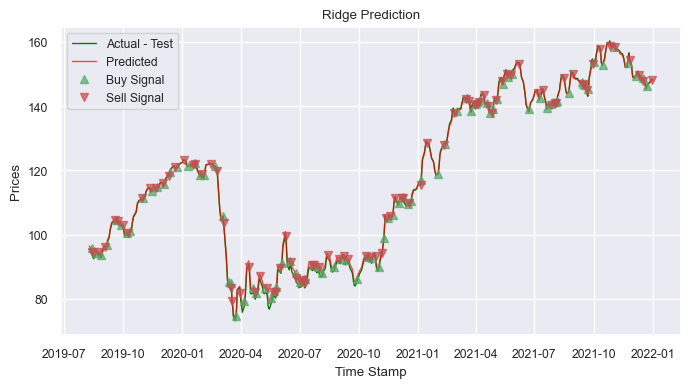

In [86]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df_ticker_dict[name].index[-635:], merged_df_ticker_dict[name]['MA3'][-635:], label="Actual - Test", color='green', linewidth=1)

plt.plot(Ridge_Signals.index, Ridge_Signals['MA3 Predict_Ridge'], label="Predicted", color='red', linewidth=1, alpha=0.7)

buy_signals = Ridge_Signals[Ridge_Signals['MA3 Signal'] == -1]
sell_signals = Ridge_Signals[Ridge_Signals['MA3 Signal'] == +1]

plt.plot(buy_signals.index, buy_signals['MA3 Predict_Ridge'], 'g^', label='Buy Signal', alpha=0.7)
plt.plot(sell_signals.index, sell_signals['MA3 Predict_Ridge'], 'rv', label='Sell Signal', alpha=0.7)


plt.title('Ridge Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)
plt.savefig('Ridge Prediction_high_quality.png', dpi=300, bbox_inches='tight')

plt.show()


In [87]:
Ridge_Signals[Ridge_Signals['MA7 Signal'] == 1].sum() 
#Lasso_Signals[Lasso_Signals['MA7 Signal'] == 1].sum() 
#GRU_Signals[GRU_Signals['MA7 Signal'] == 1].sum() 
#LSTM_Signals[LSTM_Signals['MA7 Signal'] == 1].sum() 
#seq2seq_Signals[seq2seq_Signals['MA7 Signal'] == -1].sum()

MA3                  6239.045975
MA7                  6262.446421
Close                6183.703773
Predict_Ridge        6205.184438
MA3 Predict_Ridge    6257.002844
MA7 Predict_Ridge    6277.352226
MA7 Signal             52.000000
MA3 Signal             10.000000
dtype: float64

### Ploting the Buy and Sell Signals with MA3

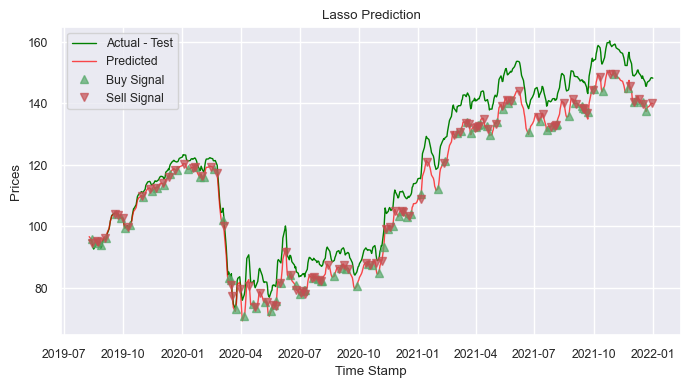

In [88]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df_ticker_dict[name].index[-635:], merged_df_ticker_dict[name]['MA3'][-635:], label="Actual - Test", color='green', linewidth=1)

plt.plot(Lasso_Signals.index, Lasso_Signals['MA3 Predict_Lasso'], label="Predicted", color='red', linewidth=1, alpha=0.7)


buy_signals = Lasso_Signals[Lasso_Signals['MA3 Signal'] == -1]
sell_signals = Lasso_Signals[Lasso_Signals['MA3 Signal'] == +1]

plt.plot(buy_signals.index, buy_signals['MA3 Predict_Lasso'], 'g^', label='Buy Signal', alpha=0.7)
plt.plot(sell_signals.index, sell_signals['MA3 Predict_Lasso'], 'rv', label='Sell Signal', alpha=0.7)


plt.title('Lasso Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()


In [89]:
print(buy_signals.shape)
print(sell_signals.shape)


(92, 8)
(92, 8)


### Trading Simulation

In [90]:
def calculate_profit(df, signal_column, initial_investment=100000.0):
    funds = initial_investment
    quantity = 0.0
    profit = 0.0

    for _, row in df.iterrows():
        signal = row[signal_column]
        close_price = row['Close']

        if signal == +1 and funds > 0:
            quantity = funds / close_price
            funds = 0.0

        elif signal == -1 and quantity > 0:
            funds = quantity * close_price
            quantity = 0.0

    last_signal = df.iloc[-1][signal_column]
    last_close_price = df.iloc[-1]['Close']

    if last_signal == -1:
        final_funds = funds
    else:
        final_funds = quantity * last_close_price

    profit = final_funds - initial_investment

    return profit

In [91]:
dfs = {
    'Ridge': Ridge_Signals,
    'Lasso': Lasso_Signals,
    'GRU': GRU_Signals, 
    'LSTM': LSTM_Signals,
}

signal_columns = ['MA3 Signal']

profits = {}

for model, df in dfs.items():
    for signal_column in signal_columns:
        profit = calculate_profit(df, signal_column, initial_investment=100000.0)
        
        profits[f'{model}_Profit_{signal_column}'] = profit

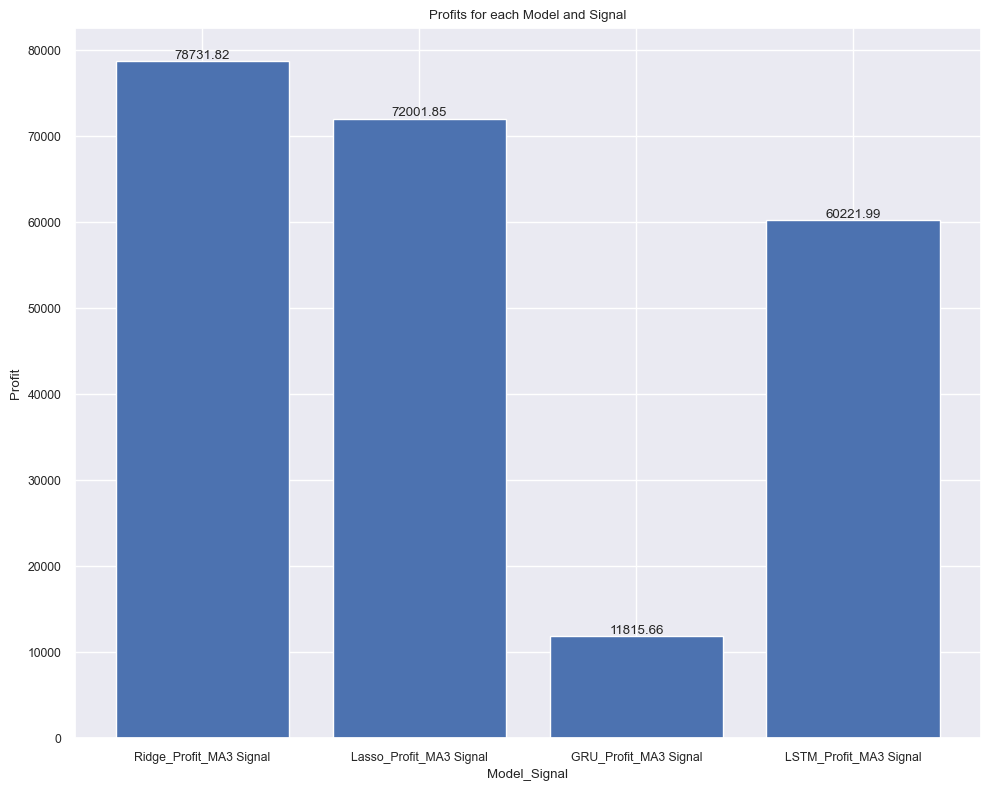

In [92]:
#plt.figure(figsize=(10,8))
#plt.bar(profits.keys(), profits.values())

# Generate the bar plot
plt.figure(figsize=(10,8))
bars = plt.bar(profits.keys(), profits.values())

# Add the text annotations on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
             ha='center', va='bottom')

plt.xlabel('Model_Signal')
plt.ylabel('Profit')
plt.title('Profits for each Model and Signal')
plt.xticks(rotation=0)  # Adjust rotation if needed
plt.subplots_adjust(bottom=0.3)  # Adjust bottom margin
plt.tight_layout()  # Adjust layout
plt.savefig('Profits for each Model and Signal_high_quality.png', dpi=300, bbox_inches='tight')
plt.show()

